# 🔍 Hacettepe Datathon 2026 - Kapsamlı Keşifsel Veri Analizi (EDA)

Bu notebook, train ve test veri setlerini **her açıdan** inceliyordu:
- 📦 Veri yükleme & temel istatistikler
- 🔎 Eksik değer analizi
- 📊 Dağılım & aykırı değer analizi
- 🔗 Korelasyon analizi
- ⏱️ Zaman serisi analizi
- 🏭 Makine bazlı analiz
- 🎯 Hedef değişken analizi

In [1]:
# ============================================================
# 1. KÜTÜPHANE YÜKLEME
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Görsel ayarlar
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
sns.set_palette('husl')

TRAIN_PATH = 'train.csv'
TEST_PATH  = 'test.csv'
SAMPLE_PATH = 'sample_submission.csv'

print('✅ Kütüphaneler yüklendi')

✅ Kütüphaneler yüklendi


## 📦 Bölüm 1 — Veri Yükleme

In [2]:
DATE_COLS = ['timestamp','starttime','endtime']

print('⏳ Train yükleniyor...')
train = pd.read_csv(TRAIN_PATH, low_memory=False)
for c in DATE_COLS:
    if c in train.columns:
        train[c] = pd.to_datetime(train[c], format='mixed', utc=True)
print(f'✅ Train: {train.shape[0]:,} satır × {train.shape[1]} sütun')

print('⏳ Test yükleniyor...')
test = pd.read_csv(TEST_PATH, low_memory=False)
for c in DATE_COLS:
    if c in test.columns:
        test[c] = pd.to_datetime(test[c], format='mixed', utc=True)
print(f'✅ Test : {test.shape[0]:,} satır × {test.shape[1]} sütun')

sample = pd.read_csv(SAMPLE_PATH)
print(f'✅ Sample submission sütunları: {list(sample.columns)}')

⏳ Train yükleniyor...


✅ Train: 2,557,652 satır × 25 sütun
⏳ Test yükleniyor...


✅ Test : 635,133 satır × 25 sütun
✅ Sample submission sütunları: ['row_id', 'bk_level']


In [3]:
print('=== TRAIN — İlk 5 Satır ===')
train.head()

=== TRAIN — İlk 5 Satır ===


,timestamp,starttime,endtime,machineid,batchkey,commandno,stepno,prgno,fabric_weight,command_repetition,...,kk_irtibat_valve,slow_dosage_valve,bk_level,bk_dosage_valve,dosage_curve_type,kk_bk_common_discharge,kk_target_level,bk_target_level,kk_mikser_robotu,bk_mikser_robotu
0,2025-08-13 04:15:21.596000+00:00,2025-08-13 07:14:50+00:00,2025-08-13 07:15:48+00:00,105,125450,19,2,86,485,0,...,True,False,9.53,False,0,False,0.0,0.0,False,False
1,2025-08-13 04:15:22.600000+00:00,2025-08-13 07:14:50+00:00,2025-08-13 07:15:48+00:00,105,125450,19,2,86,485,0,...,True,False,9.45,False,0,False,0.0,0.0,False,False
2,2025-08-13 04:15:23.599000+00:00,2025-08-13 07:14:50+00:00,2025-08-13 07:15:48+00:00,105,125450,19,2,86,485,0,...,True,False,9.53,False,0,False,0.0,0.0,False,False
3,2025-08-13 04:15:24.600000+00:00,2025-08-13 07:14:50+00:00,2025-08-13 07:15:48+00:00,105,125450,19,2,86,485,0,...,True,False,9.53,False,0,False,0.0,0.0,False,False
4,2025-08-13 04:15:25.600000+00:00,2025-08-13 07:14:50+00:00,2025-08-13 07:15:48+00:00,105,125450,19,2,86,485,0,...,True,False,9.45,False,0,False,0.0,0.0,False,False


In [4]:
print('=== TEST — İlk 5 Satır ===')
test.head()

=== TEST — İlk 5 Satır ===


,timestamp,starttime,endtime,machineid,batchkey,commandno,stepno,prgno,fabric_weight,command_repetition,...,kk_irtibat_valve,slow_dosage_valve,bk_dosage_valve,dosage_curve_type,kk_bk_common_discharge,kk_target_level,bk_target_level,kk_mikser_robotu,bk_mikser_robotu,row_id
0,2025-08-13 01:30:26.400000+00:00,2025-08-13 04:24:30+00:00,2025-08-13 04:35:36+00:00,105,125425,22,16,1066,485,0,...,False,False,True,0,False,0.0,18.57,False,False,0
1,2025-08-13 01:30:27.387000+00:00,2025-08-13 04:24:30+00:00,2025-08-13 04:35:36+00:00,105,125425,22,16,1066,485,0,...,False,False,True,0,False,0.0,18.50,False,False,1
2,2025-08-13 01:30:28.387000+00:00,2025-08-13 04:24:30+00:00,2025-08-13 04:35:36+00:00,105,125425,22,16,1066,485,0,...,False,False,True,0,False,0.0,18.42,False,False,2
3,2025-08-13 01:30:29.390000+00:00,2025-08-13 04:24:30+00:00,2025-08-13 04:35:36+00:00,105,125425,22,16,1066,485,0,...,False,True,True,0,False,0.0,18.35,False,False,3
4,2025-08-13 01:30:30.390000+00:00,2025-08-13 04:24:30+00:00,2025-08-13 04:35:36+00:00,105,125425,22,16,1066,485,0,...,False,False,True,0,False,0.0,18.28,False,False,4


In [5]:
# Veri tipleri
print('=== TRAIN — Veri Tipleri ===')
print(train.dtypes)
print()
print('=== TEST — Veri Tipleri ===')
print(test.dtypes)

=== TRAIN — Veri Tipleri ===
timestamp                 datetime64[ns, UTC]
starttime                 datetime64[ns, UTC]
endtime                   datetime64[ns, UTC]
machineid                               int64
batchkey                                int64
commandno                               int64
stepno                                  int64
prgno                                   int64
fabric_weight                           int64
command_repetition                      int64
kk_level                              float64
bk_irtibat_valve                         bool
fast_dosage_valve                        bool
ak_level                              float64
kk_dosage_valve                          bool
kk_irtibat_valve                         bool
slow_dosage_valve                        bool
bk_level                              float64
bk_dosage_valve                          bool
dosage_curve_type                       int64
kk_bk_common_discharge                   bool
kk_ta

## 📊 Bölüm 2 — Temel İstatistikler

In [6]:
print('=== TRAIN — Sayısal İstatistikler ===')
train.describe().T.style.background_gradient(cmap='Blues')

=== TRAIN — Sayısal İstatistikler ===


,count,mean,std,min,25%,50%,75%,max
machineid,2557652.000000,170.257245,62.493088,105.000000,119.000000,121.000000,242.000000,243.000000
batchkey,2557652.000000,134447.663398,5490.125692,125440.000000,129442.000000,134490.000000,139195.000000,144194.000000
commandno,2557652.000000,21.228715,1.192883,19.000000,21.000000,22.000000,22.000000,22.000000
stepno,2557652.000000,21.013267,16.036713,1.000000,7.000000,17.000000,32.000000,113.000000
prgno,2557652.000000,2363.973177,1214.641280,1.000000,1080.000000,3103.000000,3110.000000,5553.000000
fabric_weight,2557652.000000,654.564405,404.728099,0.000000,205.000000,626.000000,940.000000,1500.000000
command_repetition,2557652.000000,0.054724,0.269659,0.000000,0.000000,0.000000,0.000000,6.000000
kk_level,2557652.000000,9.000577,16.517485,0.000000,0.000000,0.000000,10.990000,175.370000
ak_level,2557652.000000,3680.641219,2085.393141,0.000000,1656.960000,3719.760000,5412.640000,11833.620000
bk_level,2557652.000000,31.437174,26.266363,0.000000,3.570000,31.380000,50.170000,100.000000


In [7]:
print('=== TEST — Sayısal İstatistikler ===')
test.describe().T.style.background_gradient(cmap='Greens')

=== TEST — Sayısal İstatistikler ===


,count,mean,std,min,25%,50%,75%,max
machineid,635133.000000,168.362400,62.047262,105.000000,119.000000,121.000000,242.000000,243.000000
batchkey,635133.000000,134594.115110,5395.596797,125425.000000,129542.000000,135004.000000,139044.000000,144175.000000
commandno,635133.000000,21.242568,1.182168,19.000000,21.000000,22.000000,22.000000,22.000000
stepno,635133.000000,22.442777,17.148921,1.000000,7.000000,18.000000,35.000000,95.000000
prgno,635133.000000,2355.242022,1222.523401,11.000000,1080.000000,3104.000000,3111.000000,5552.000000
fabric_weight,635133.000000,656.184421,394.305963,0.000000,222.000000,630.000000,900.000000,1500.000000
command_repetition,635133.000000,0.069631,0.325464,0.000000,0.000000,0.000000,0.000000,5.000000
kk_level,635133.000000,9.847743,16.524120,0.000000,0.000000,0.090000,14.850000,172.540000
ak_level,635133.000000,3697.607400,2068.760464,0.000000,1990.110000,3603.820000,5357.270000,10834.710000
dosage_curve_type,635133.000000,-1.262595,1.488757,-4.000000,-3.000000,0.000000,0.000000,0.000000


In [8]:
# Sütun karşılaştırması: train vs test
train_cols = set(train.columns)
test_cols  = set(test.columns)

only_in_train = train_cols - test_cols
only_in_test  = test_cols - train_cols

print(f'🔵 Sadece Train\'de bulunan sütunlar ({len(only_in_train)}): {only_in_train}')
print(f'🟢 Sadece Test\'de bulunan sütunlar ({len(only_in_test)}): {only_in_test}')
print(f'🟡 Ortak sütunlar: {len(train_cols & test_cols)}')

🔵 Sadece Train'de bulunan sütunlar (1): {'bk_level'}
🟢 Sadece Test'de bulunan sütunlar (1): {'row_id'}
🟡 Ortak sütunlar: 24


## 🔎 Bölüm 3 — Eksik Değer Analizi

In [9]:
def missing_summary(df, name):
    miss = df.isnull().sum()
    miss_pct = (miss / len(df) * 100).round(2)
    summary = pd.DataFrame({'Eksik Sayı': miss, 'Eksik %': miss_pct})
    summary = summary[summary['Eksik Sayı'] > 0].sort_values('Eksik %', ascending=False)
    print(f'\n=== {name} — Eksik Değerler ===')
    if summary.empty:
        print('✅ Hiç eksik değer yok!')
    else:
        print(summary)
    return summary

miss_train = missing_summary(train, 'TRAIN')
miss_test  = missing_summary(test,  'TEST')


=== TRAIN — Eksik Değerler ===


✅ Hiç eksik değer yok!

=== TEST — Eksik Değerler ===
✅ Hiç eksik değer yok!


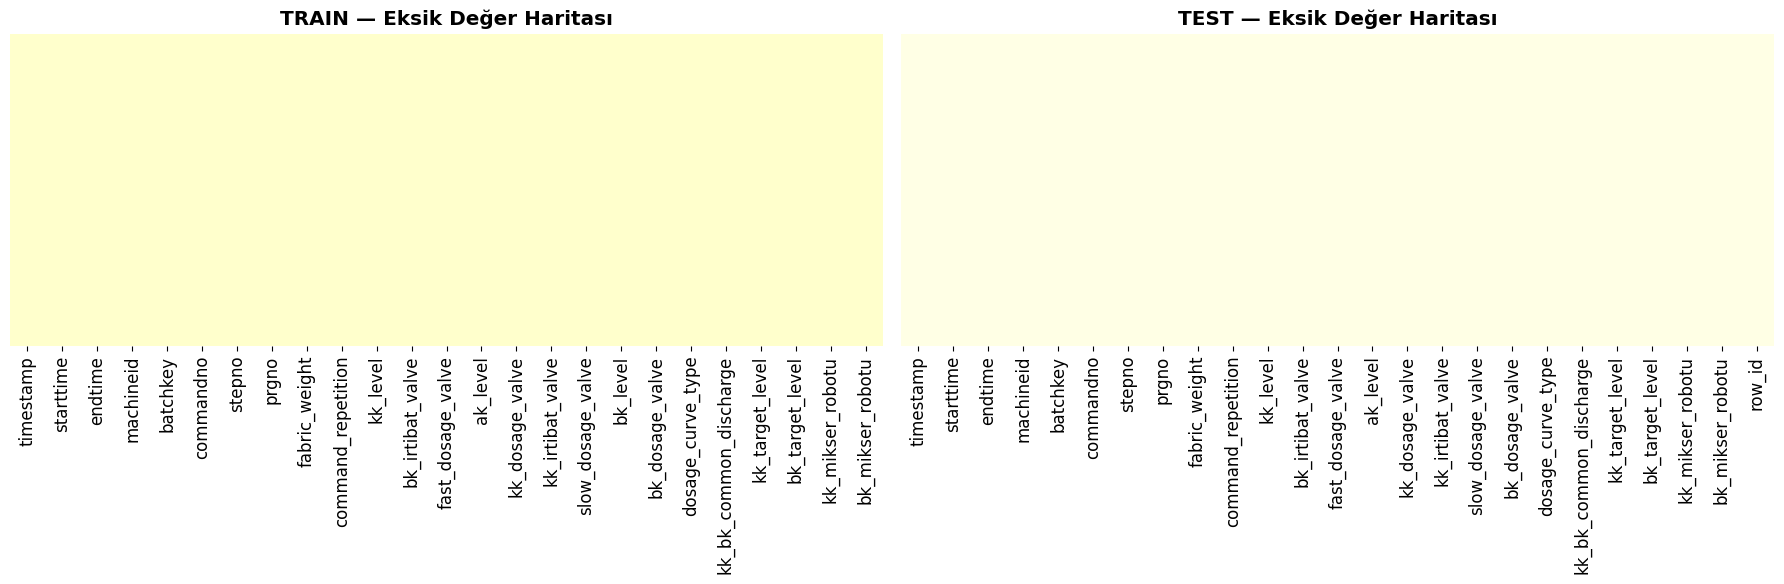

In [10]:
# Eksik değer ısı haritası
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Her 500 satırdan birini örnek al (hız için)
sample_train = train.iloc[::500]
sample_test  = test.iloc[::500]

sns.heatmap(sample_train.isnull(), cbar=False, yticklabels=False, ax=axes[0], cmap='YlOrRd')
axes[0].set_title('TRAIN — Eksik Değer Haritası', fontweight='bold')

sns.heatmap(sample_test.isnull(), cbar=False, yticklabels=False, ax=axes[1], cmap='YlGn')
axes[1].set_title('TEST — Eksik Değer Haritası', fontweight='bold')

plt.tight_layout()
plt.savefig('missing_heatmap.png', dpi=120, bbox_inches='tight')
plt.show()

## 📈 Bölüm 4 — Sayısal Sütunların Dağılımı

In [11]:
# Sayısal sütunları belirle
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# Kimlik/anahtar sütunları çıkar
exclude = {'machineid','batchkey','commandno','stepno','prgno',
           'command_repetition','dosage_curve_type'}
num_feat = [c for c in num_cols if c not in exclude]
print(f'Analiz edilecek sayısal özellikler ({len(num_feat)}): {num_feat}')

Analiz edilecek sayısal özellikler (6): ['fabric_weight', 'kk_level', 'ak_level', 'bk_level', 'kk_target_level', 'bk_target_level']


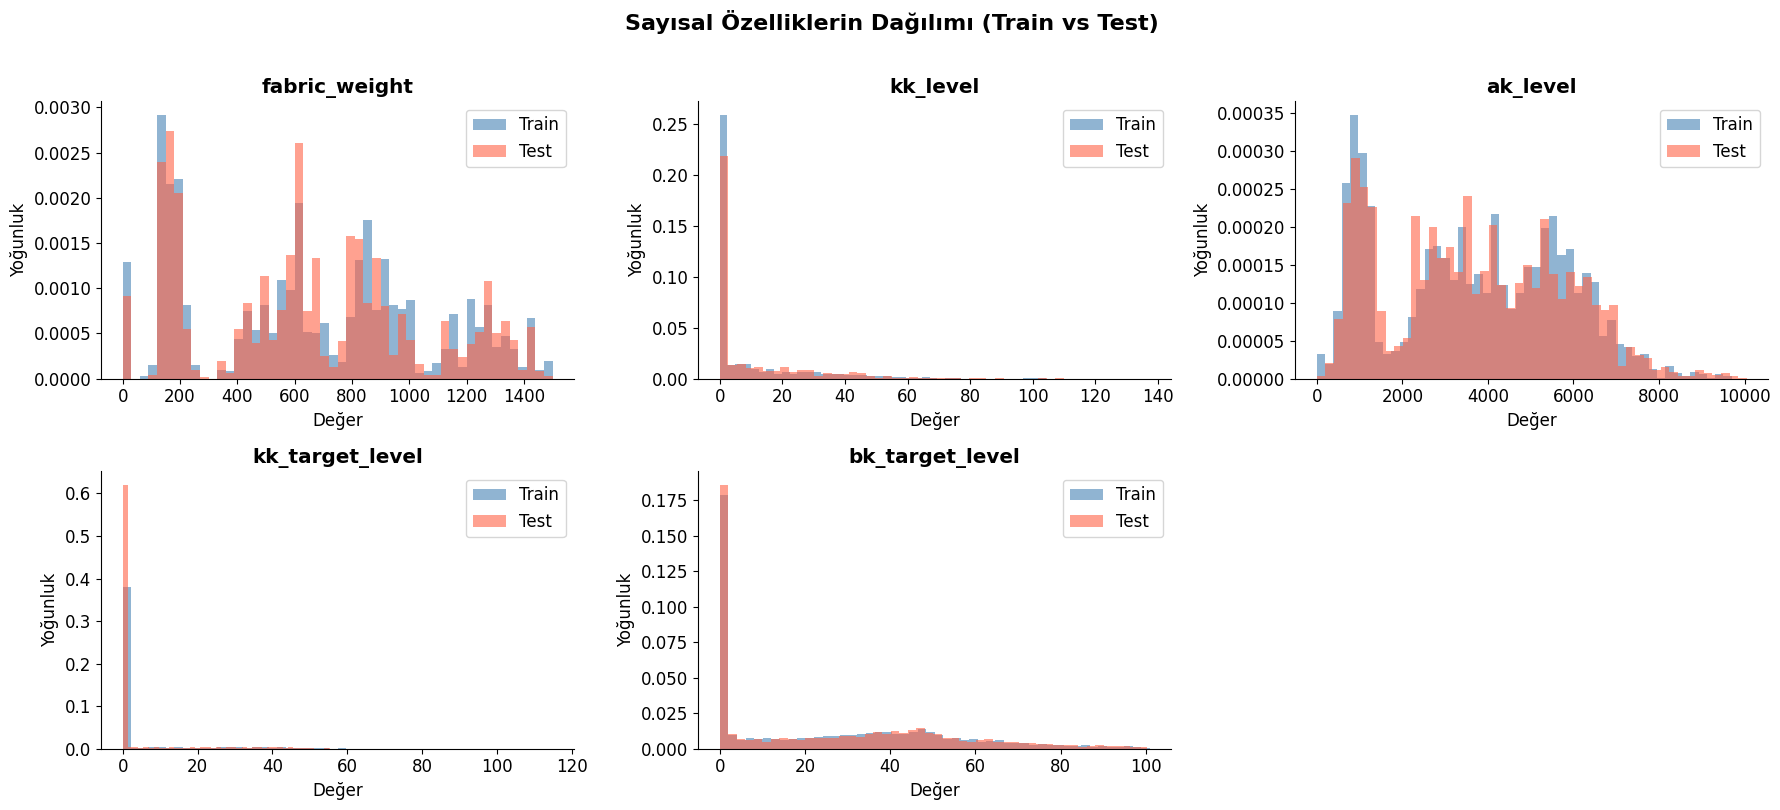

In [12]:
# Her sayısal özellik için histogram (train vs test overlay)
common_num = [c for c in num_feat if c in test.columns]
ncols = 3
nrows = int(np.ceil(len(common_num) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

for i, col in enumerate(common_num):
    ax = axes[i]
    train_sample = train[col].dropna().sample(min(5000, len(train)), random_state=42)
    test_sample  = test[col].dropna().sample(min(5000, len(test)), random_state=42)
    
    ax.hist(train_sample, bins=50, alpha=0.6, label='Train', color='steelblue', density=True)
    ax.hist(test_sample,  bins=50, alpha=0.6, label='Test',  color='tomato',    density=True)
    ax.set_title(col, fontweight='bold')
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Sayısal Özelliklerin Dağılımı (Train vs Test)', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('distributions.png', dpi=120, bbox_inches='tight')
plt.show()

## 📦 Bölüm 5 — Aykırı Değer Analizi (Boxplot & IQR)

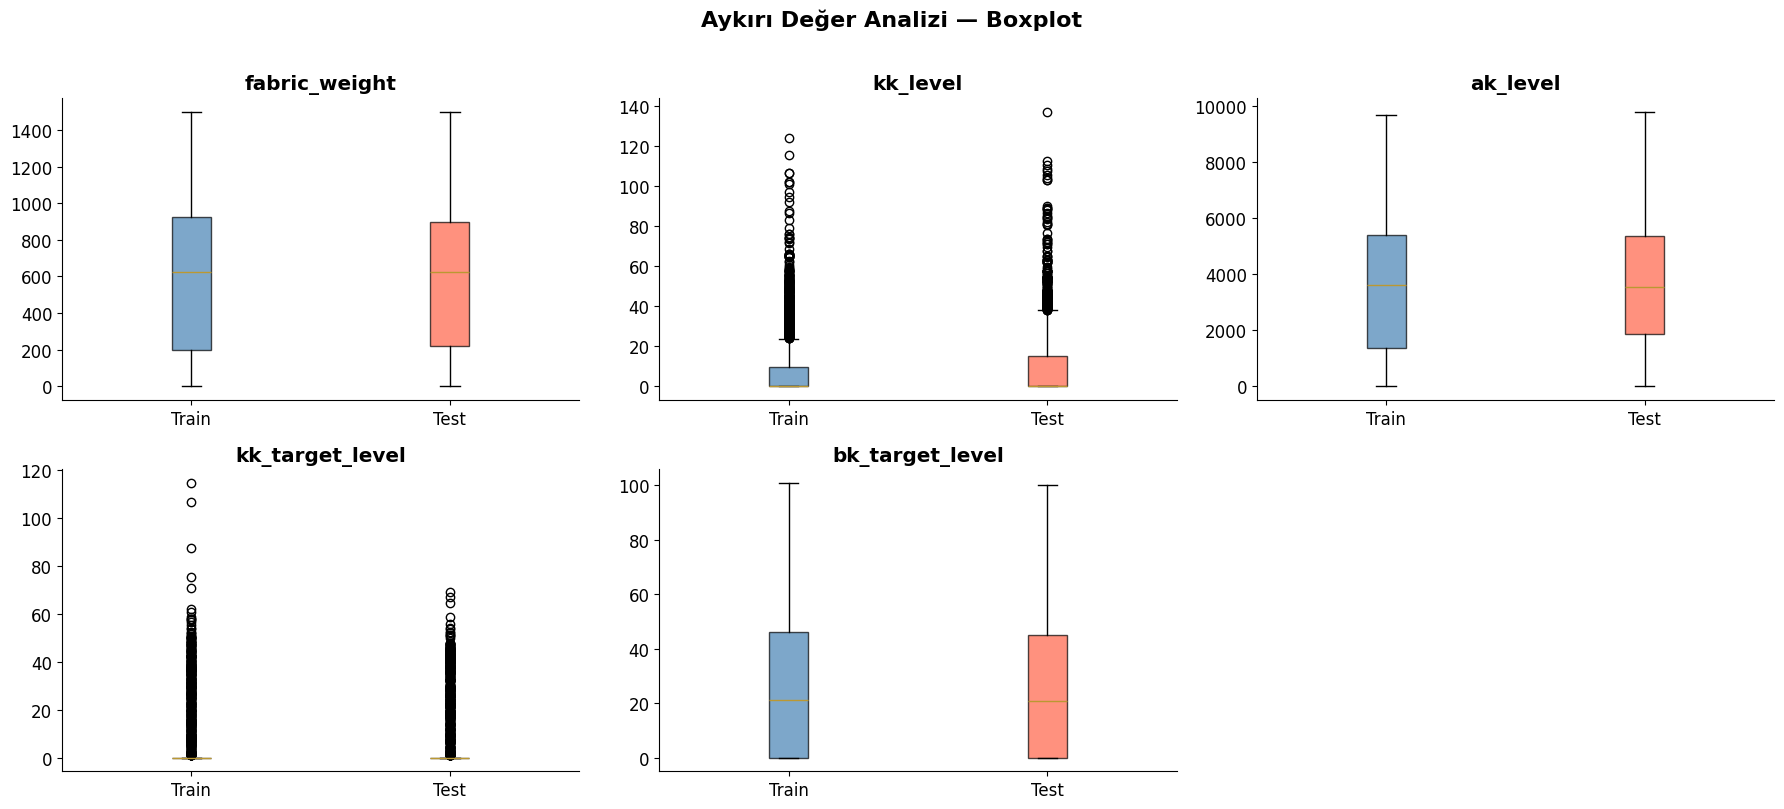

In [13]:
# Boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

for i, col in enumerate(common_num):
    ax = axes[i]
    data = [
        train[col].dropna().sample(min(3000, len(train)), random_state=42).values,
        test[col].dropna().sample(min(3000, len(test)),  random_state=42).values
    ]
    bp = ax.boxplot(data, labels=['Train','Test'], patch_artist=True,
                    boxprops=dict(alpha=0.7))
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('tomato')
    ax.set_title(col, fontweight='bold')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Aykırı Değer Analizi — Boxplot', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('boxplots.png', dpi=120, bbox_inches='tight')
plt.show()

In [14]:
# IQR yöntemi ile aykırı değer sayısı
def count_outliers_iqr(df, col):
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    mask = (df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)
    return mask.sum(), round(mask.sum()/len(df)*100, 2)

print(f'{'Sütun':<30} {'Train Aykırı':>15} {'Train %':>10} {'Test Aykırı':>15} {'Test %':>10}')
print('-' * 85)
for col in common_num:
    tn, tp = count_outliers_iqr(train, col)
    en, ep = count_outliers_iqr(test, col)
    print(f'{col:<30} {tn:>15,} {tp:>9}% {en:>15,} {ep:>9}%')

Sütun                             Train Aykırı    Train %     Test Aykırı     Test %
-------------------------------------------------------------------------------------
fabric_weight                                0       0.0%               0       0.0%
kk_level                               345,702     13.52%          54,738      8.62%
ak_level                                   194      0.01%              79      0.01%
kk_target_level                        365,655      14.3%          92,917     14.63%
bk_target_level                              0       0.0%               0       0.0%


## 🔗 Bölüm 6 — Korelasyon Analizi

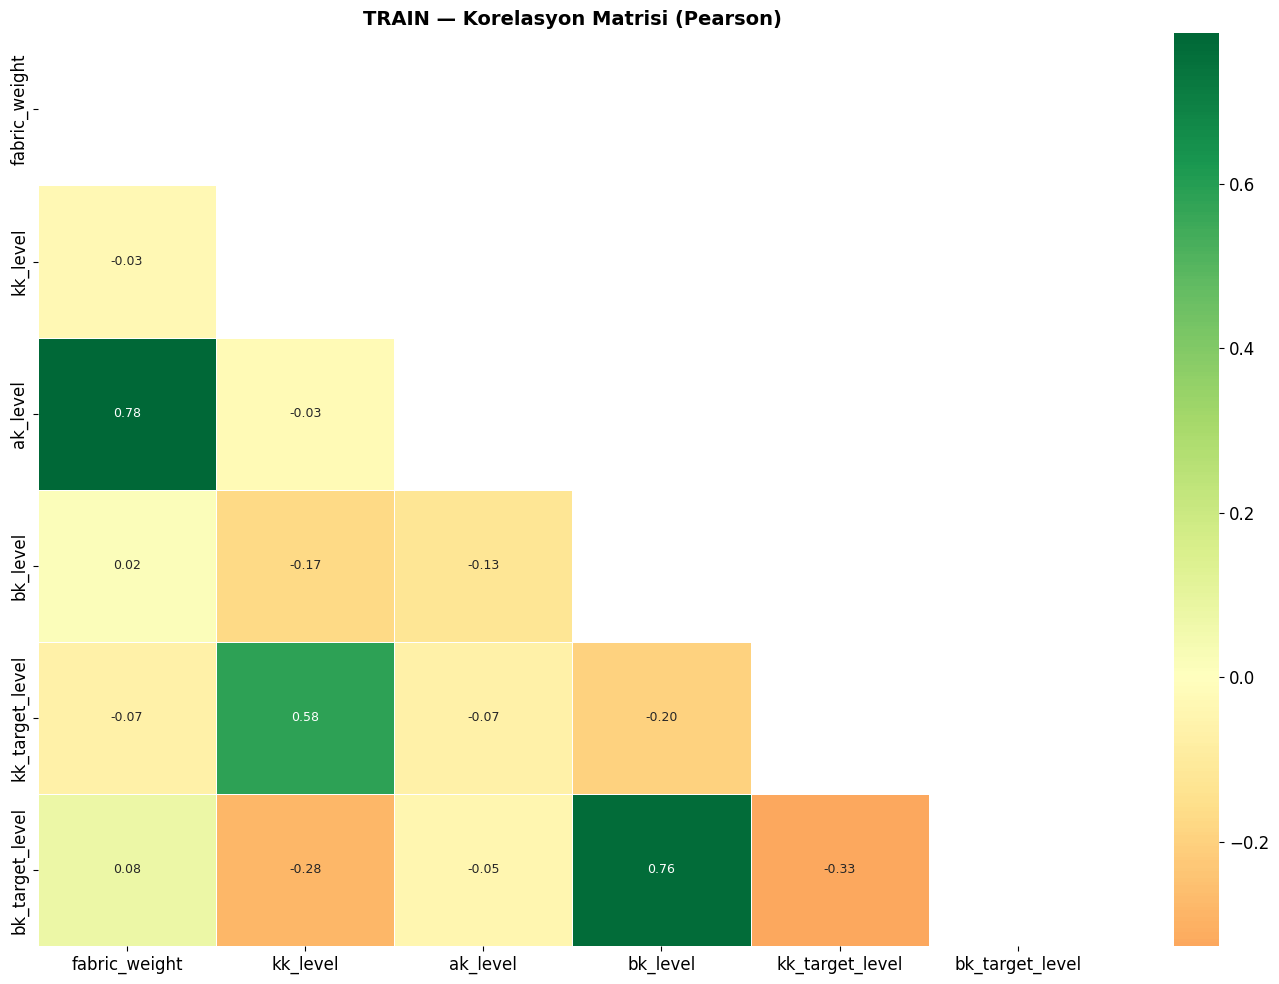

In [15]:
# Korelasyon matrisi (train)
corr_cols = [c for c in num_feat if c in train.columns and train[c].nunique() > 2]
corr_sample = train[corr_cols].sample(min(10000, len(train)), random_state=42)
corr_matrix = corr_sample.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, linewidths=0.5, ax=ax, annot_kws={'size':9})
ax.set_title('TRAIN — Korelasyon Matrisi (Pearson)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=120, bbox_inches='tight')
plt.show()

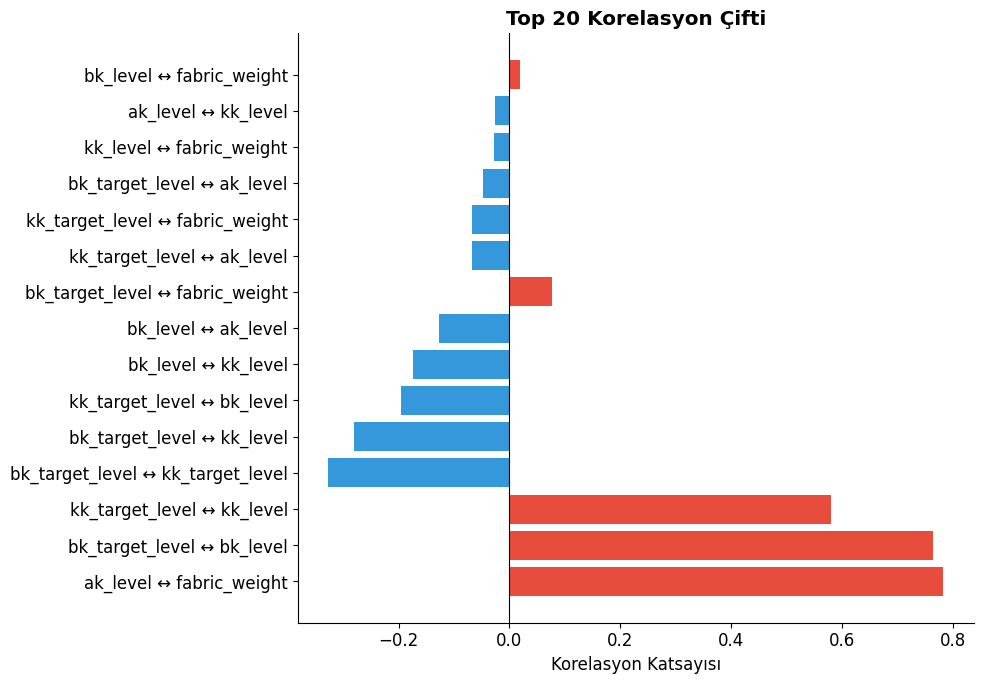

In [16]:
# En yüksek mutlak korelasyonlar
corr_pairs = (corr_matrix.where(~mask)
              .stack()
              .reset_index()
              .rename(columns={'level_0':'Sütun1','level_1':'Sütun2', 0:'Korelasyon'}))
corr_pairs['Abs'] = corr_pairs['Korelasyon'].abs()
top_corr = corr_pairs.sort_values('Abs', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#e74c3c' if v > 0 else '#3498db' for v in top_corr['Korelasyon']]
bars = ax.barh(top_corr['Sütun1'] + ' ↔ ' + top_corr['Sütun2'],
               top_corr['Korelasyon'], color=colors)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel('Korelasyon Katsayısı')
ax.set_title('Top 20 Korelasyon Çifti', fontweight='bold')
plt.tight_layout()
plt.savefig('top_correlations.png', dpi=120, bbox_inches='tight')
plt.show()

## 🔵 Bölüm 7 — Boolean / Kategorik Sütun Analizi

Boolean/Kategorik sütunlar: ['bk_irtibat_valve', 'fast_dosage_valve', 'kk_dosage_valve', 'kk_irtibat_valve', 'slow_dosage_valve', 'bk_dosage_valve', 'kk_bk_common_discharge', 'kk_mikser_robotu', 'bk_mikser_robotu']


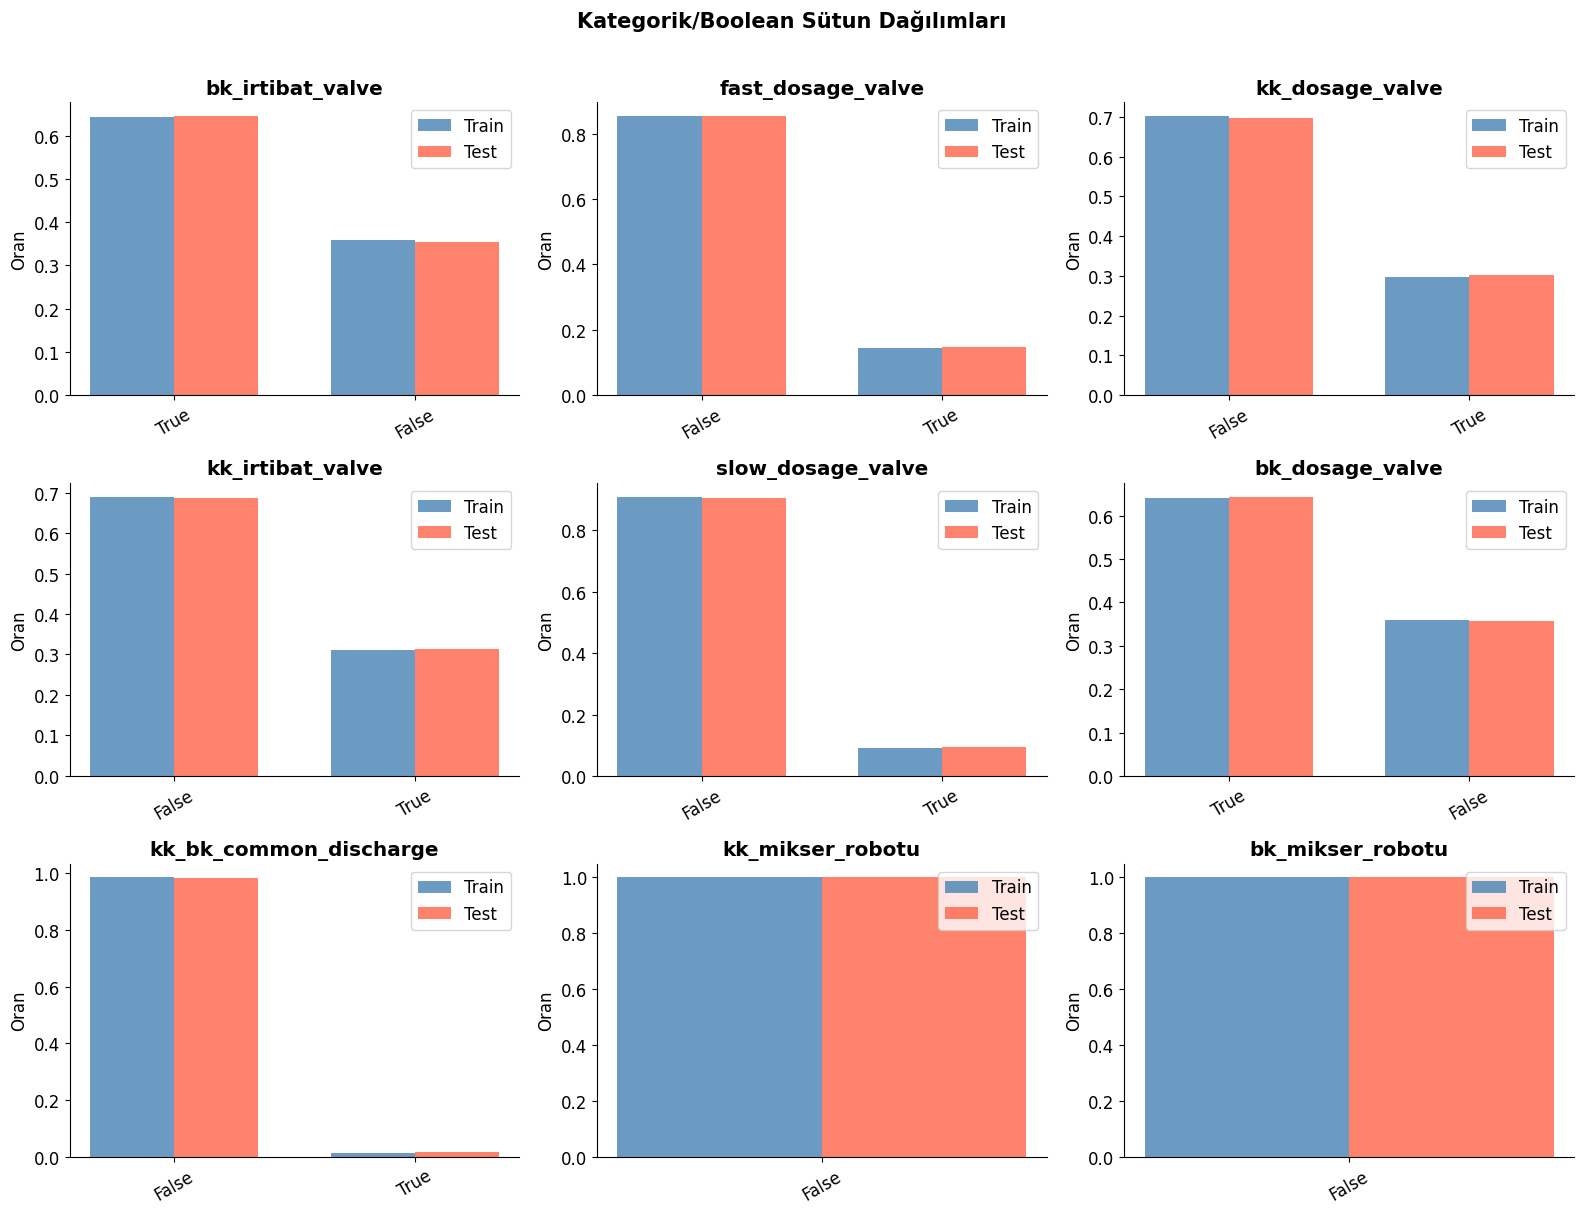

In [17]:
# Boolean / object sütunları
bool_cols = [c for c in train.columns if train[c].dtype == object or str(train[c].dtype) == 'bool']
bool_cols = [c for c in bool_cols if c not in DATE_COLS]
print(f'Boolean/Kategorik sütunlar: {bool_cols}')

ncols2 = 3
nrows2 = int(np.ceil(len(bool_cols) / ncols2)) if bool_cols else 1
fig, axes = plt.subplots(nrows2, ncols2, figsize=(16, nrows2 * 4))
axes = np.array(axes).flatten()

for i, col in enumerate(bool_cols):
    ax = axes[i]
    vc_train = train[col].astype(str).value_counts(normalize=True)
    vc_test  = test[col].astype(str).value_counts(normalize=True) if col in test.columns else None
    
    x = np.arange(len(vc_train))
    w = 0.35
    ax.bar(x - w/2, vc_train.values, w, label='Train', color='steelblue', alpha=0.8)
    if vc_test is not None:
        vc_test = vc_test.reindex(vc_train.index, fill_value=0)
        ax.bar(x + w/2, vc_test.values, w, label='Test', color='tomato', alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(vc_train.index, rotation=30)
    ax.set_title(col, fontweight='bold')
    ax.set_ylabel('Oran')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Kategorik/Boolean Sütun Dağılımları', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=120, bbox_inches='tight')
plt.show()

## ⏱️ Bölüm 8 — Zaman Serisi Analizi

In [18]:
# timestamp'i index yap, saatlik örnekle
train['ts'] = pd.to_datetime(train['timestamp'], utc=True)
test['ts']  = pd.to_datetime(test['timestamp'],  utc=True)

print('TRAIN zaman aralığı :', train['ts'].min(), '→', train['ts'].max())
print('TEST  zaman aralığı :', test['ts'].min(),  '→', test['ts'].max())

TRAIN zaman aralığı : 2025-08-13 04:14:50.573000+00:00 → 2026-02-13 03:33:11.105000+00:00
TEST  zaman aralığı : 2025-08-13 01:24:30.961000+00:00 → 2026-02-13 01:13:38.080000+00:00


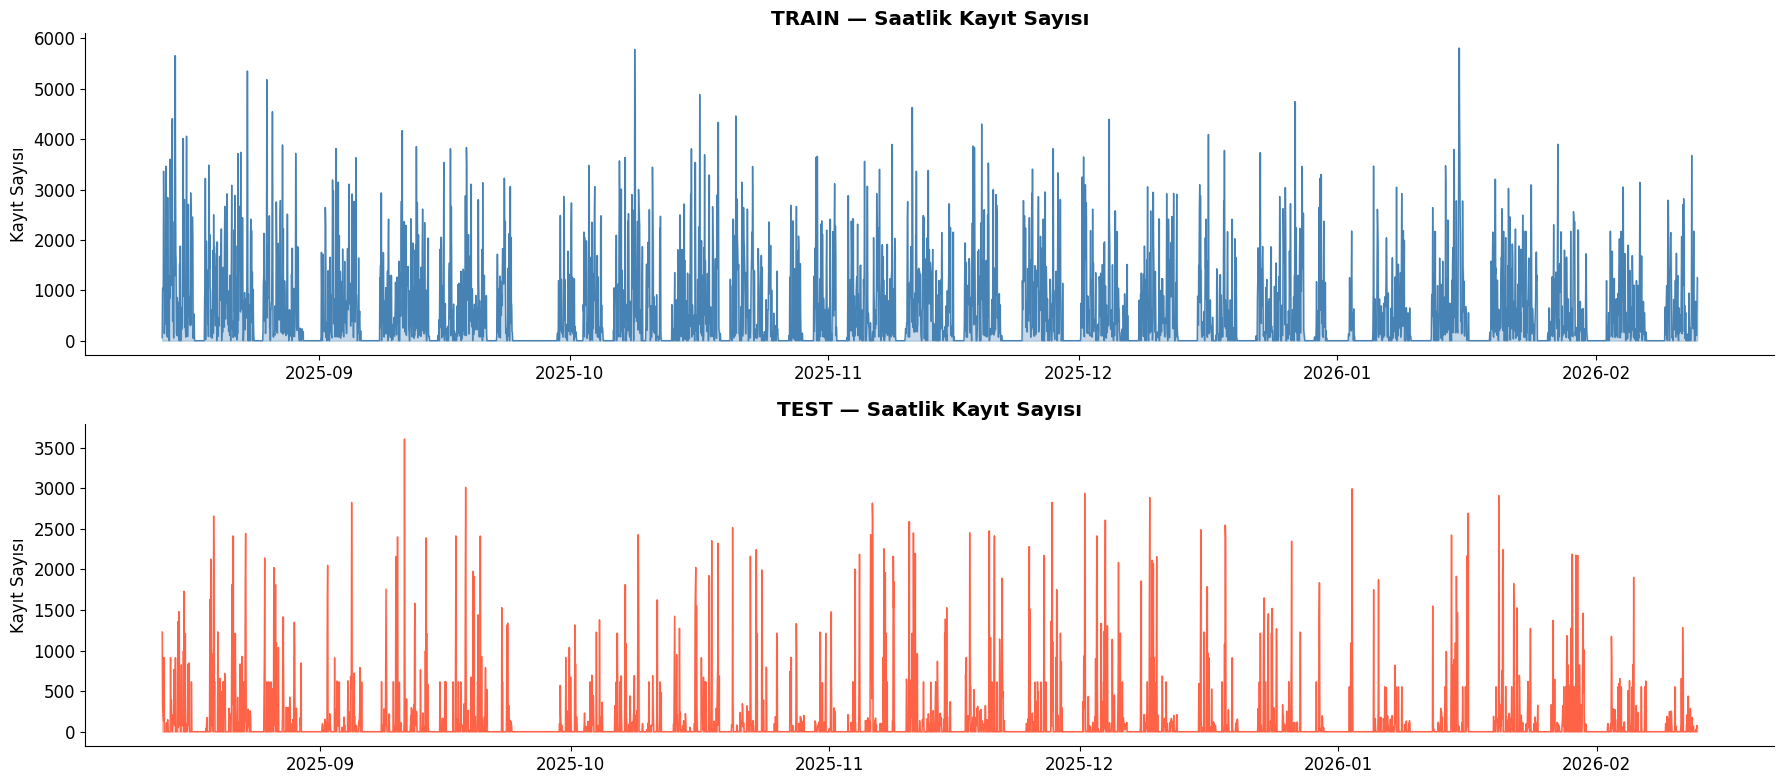

In [19]:
# Saatlik kayıt sayısı
train_hourly = train.set_index('ts').resample('1h').size()
test_hourly  = test.set_index('ts').resample('1h').size()

fig, axes = plt.subplots(2, 1, figsize=(18, 8))
axes[0].plot(train_hourly.index, train_hourly.values, color='steelblue', linewidth=1)
axes[0].fill_between(train_hourly.index, train_hourly.values, alpha=0.3, color='steelblue')
axes[0].set_title('TRAIN — Saatlik Kayıt Sayısı', fontweight='bold')
axes[0].set_ylabel('Kayıt Sayısı')

axes[1].plot(test_hourly.index, test_hourly.values, color='tomato', linewidth=1)
axes[1].fill_between(test_hourly.index, test_hourly.values, alpha=0.3, color='tomato')
axes[1].set_title('TEST — Saatlik Kayıt Sayısı', fontweight='bold')
axes[1].set_ylabel('Kayıt Sayısı')

plt.tight_layout()
plt.savefig('time_series_count.png', dpi=120, bbox_inches='tight')
plt.show()

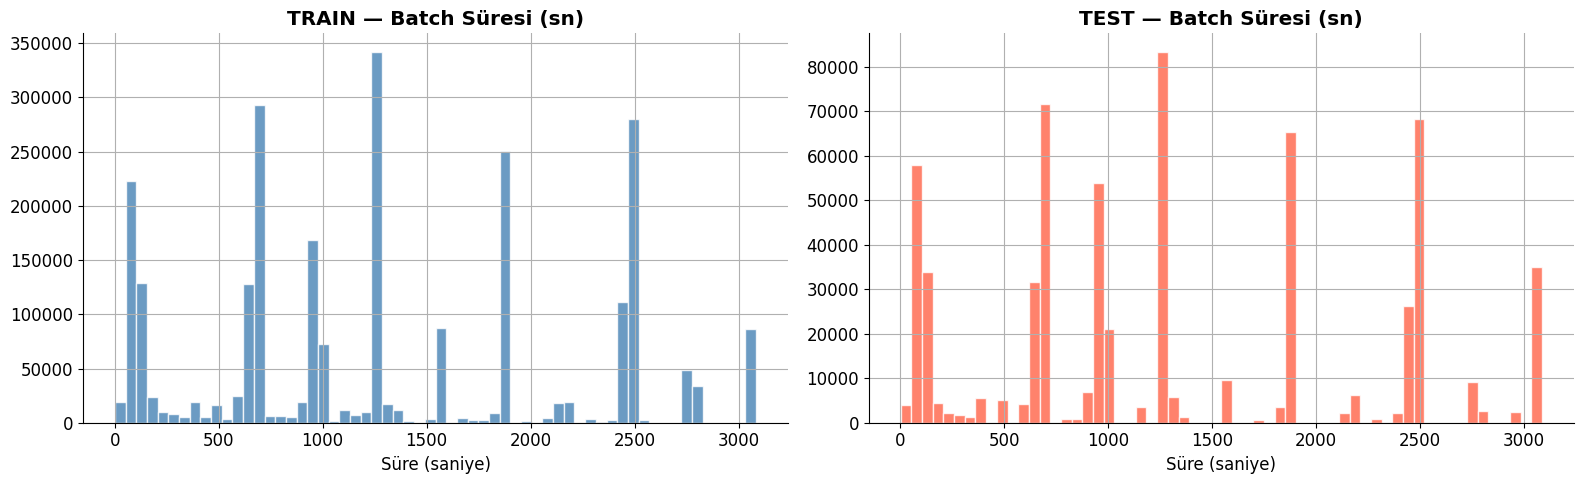

Train — Ortalama süre: 1397.9 sn
Test  — Ortalama süre: 1334.1 sn


In [20]:
# Süre analizi (endtime - starttime)
train['duration_sec'] = (pd.to_datetime(train['endtime'], utc=True) -
                         pd.to_datetime(train['starttime'], utc=True)).dt.total_seconds()
test['duration_sec']  = (pd.to_datetime(test['endtime'],  utc=True) -
                         pd.to_datetime(test['starttime'],  utc=True)).dt.total_seconds()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
train['duration_sec'].clip(0, train['duration_sec'].quantile(0.99)).hist(
    bins=60, ax=axes[0], color='steelblue', alpha=0.8, edgecolor='white')
axes[0].set_title('TRAIN — Batch Süresi (sn)', fontweight='bold')
axes[0].set_xlabel('Süre (saniye)')

test['duration_sec'].clip(0, test['duration_sec'].quantile(0.99)).hist(
    bins=60, ax=axes[1], color='tomato', alpha=0.8, edgecolor='white')
axes[1].set_title('TEST — Batch Süresi (sn)', fontweight='bold')
axes[1].set_xlabel('Süre (saniye)')

plt.tight_layout()
plt.savefig('duration_analysis.png', dpi=120, bbox_inches='tight')
plt.show()
print('Train — Ortalama süre:', round(train['duration_sec'].mean(), 1), 'sn')
print('Test  — Ortalama süre:', round(test['duration_sec'].mean(), 1), 'sn')

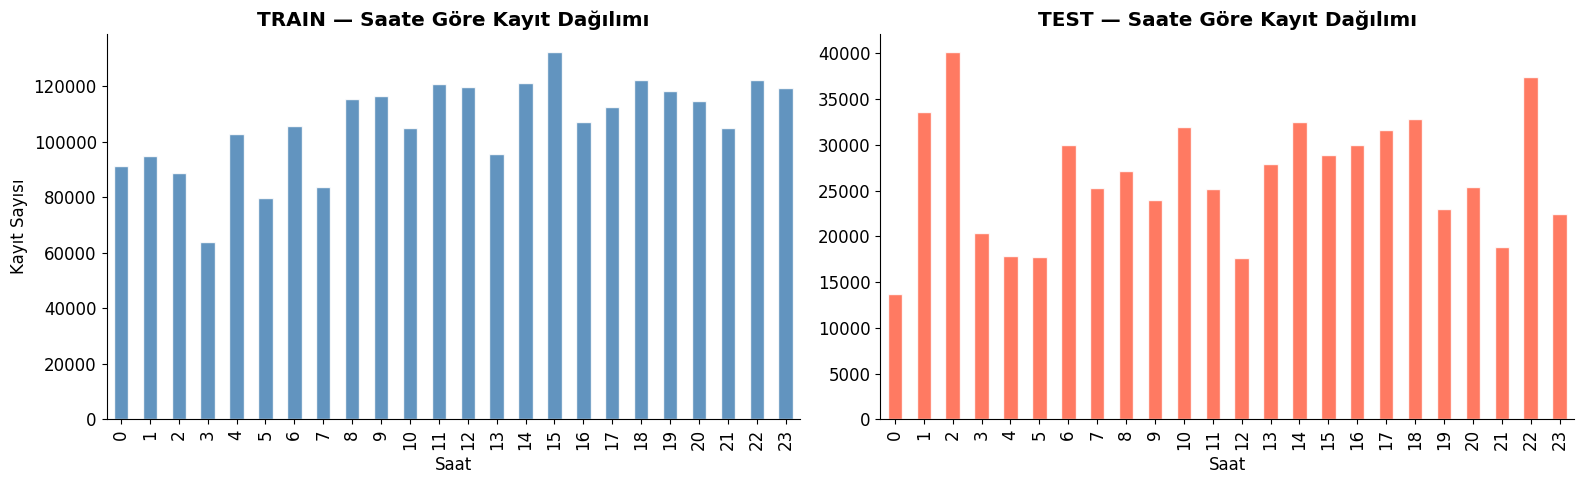

In [21]:
# Saat dilimi dağılımı
train['hour'] = train['ts'].dt.hour
test['hour']  = test['ts'].dt.hour

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
train['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0],
                                               color='steelblue', alpha=0.85, edgecolor='white')
axes[0].set_title('TRAIN — Saate Göre Kayıt Dağılımı', fontweight='bold')
axes[0].set_xlabel('Saat')
axes[0].set_ylabel('Kayıt Sayısı')

test['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[1],
                                              color='tomato', alpha=0.85, edgecolor='white')
axes[1].set_title('TEST — Saate Göre Kayıt Dağılımı', fontweight='bold')
axes[1].set_xlabel('Saat')

plt.tight_layout()
plt.savefig('hourly_distribution.png', dpi=120, bbox_inches='tight')
plt.show()

## 🏭 Bölüm 9 — Makine Bazlı Analiz

Train — Benzersiz makine sayısı : 5
Test  — Benzersiz makine sayısı : 5


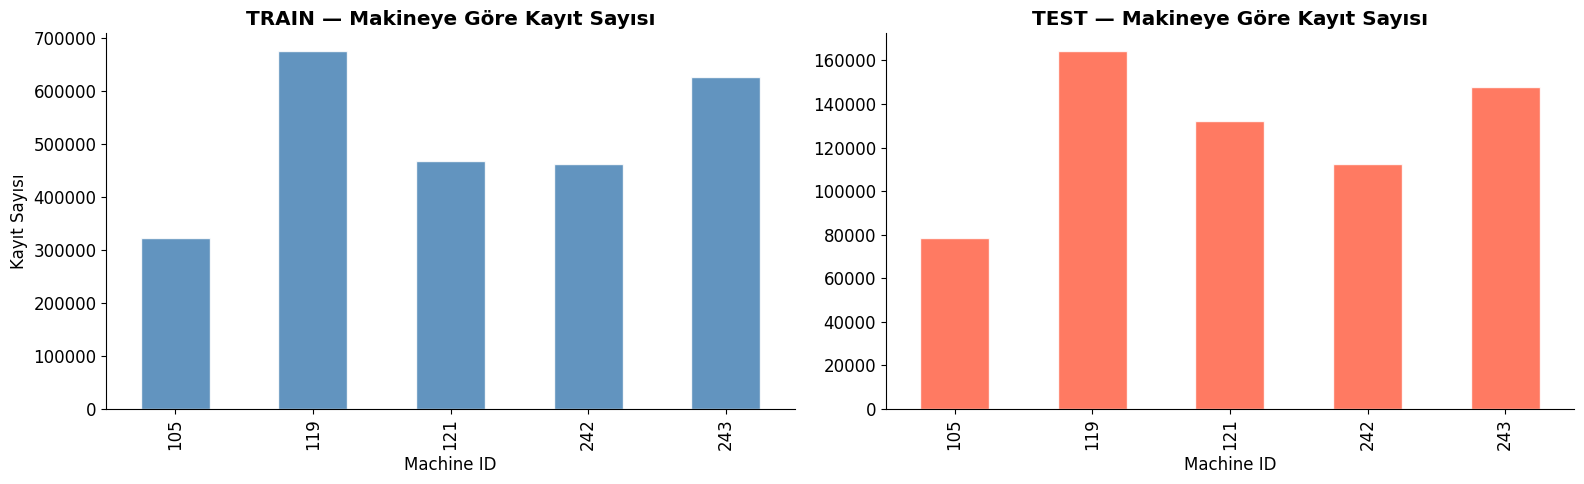

In [22]:
# Makine sayısı
print(f'Train — Benzersiz makine sayısı : {train["machineid"].nunique()}')
print(f'Test  — Benzersiz makine sayısı : {test["machineid"].nunique()}')

# Her makinenin kayıt sayısı
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
train['machineid'].value_counts().sort_index().plot(kind='bar', ax=axes[0],
                                                    color='steelblue', alpha=0.85, edgecolor='white')
axes[0].set_title('TRAIN — Makineye Göre Kayıt Sayısı', fontweight='bold')
axes[0].set_xlabel('Machine ID')
axes[0].set_ylabel('Kayıt Sayısı')

test['machineid'].value_counts().sort_index().plot(kind='bar', ax=axes[1],
                                                   color='tomato', alpha=0.85, edgecolor='white')
axes[1].set_title('TEST — Makineye Göre Kayıt Sayısı', fontweight='bold')
axes[1].set_xlabel('Machine ID')

plt.tight_layout()
plt.savefig('machine_distribution.png', dpi=120, bbox_inches='tight')
plt.show()

In [23]:
# Makine bazında sayısal özellik ortalamaları
machine_stats = train.groupby('machineid')[num_feat].mean().round(3)
print('=== Makine Bazında Özellik Ortalamaları (Train) ===')
machine_stats.style.background_gradient(cmap='coolwarm', axis=0)

=== Makine Bazında Özellik Ortalamaları (Train) ===


,fabric_weight,kk_level,ak_level,bk_level,kk_target_level,bk_target_level
machineid,,,,,,
105,479.909000,5.901000,2941.674000,21.124000,2.710000,15.523000
119,881.508000,7.733000,5350.151000,31.049000,3.110000,27.265000
121,495.898000,6.537000,3491.348000,30.401000,3.049000,26.280000
242,1265.463000,11.219000,5667.396000,32.731000,3.363000,26.899000
243,166.930000,12.169000,933.573000,36.987000,5.621000,26.574000


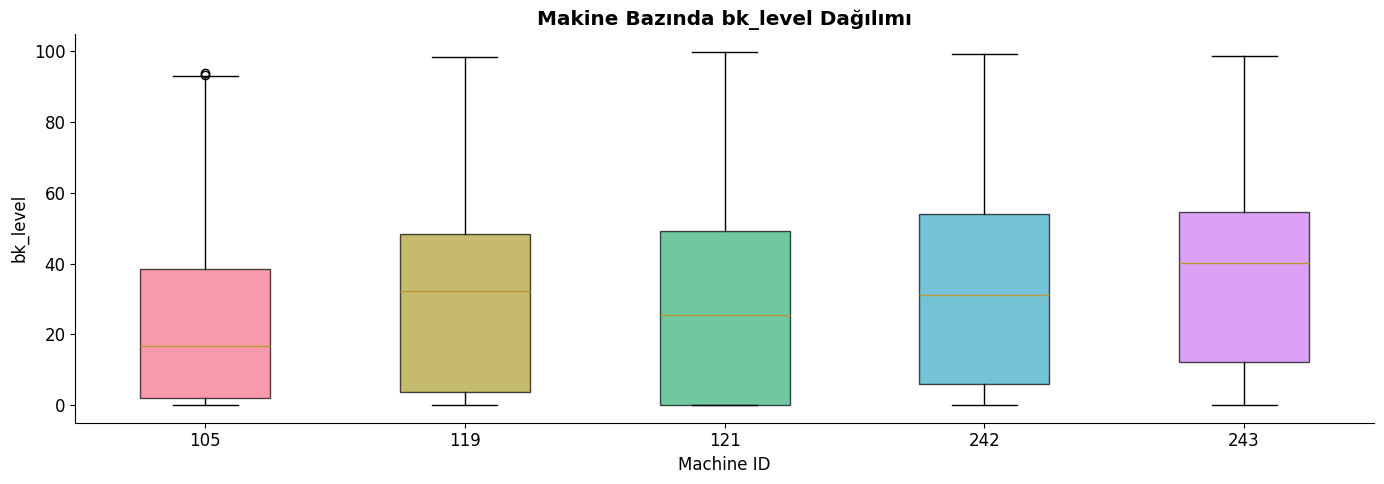

In [24]:
# Makine bazında hedef değişken dağılımı (bk_level)
if 'bk_level' in train.columns:
    fig, ax = plt.subplots(figsize=(14, 5))
    machines = sorted(train['machineid'].unique())
    data_per_machine = [train[train['machineid']==m]['bk_level'].dropna().sample(
                            min(1000, sum(train['machineid']==m)), random_state=42).values
                        for m in machines]
    bp = ax.boxplot(data_per_machine, labels=machines, patch_artist=True)
    palette = sns.color_palette('husl', len(machines))
    for patch, color in zip(bp['boxes'], palette):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax.set_title('Makine Bazında bk_level Dağılımı', fontweight='bold')
    ax.set_xlabel('Machine ID')
    ax.set_ylabel('bk_level')
    plt.tight_layout()
    plt.savefig('machine_bklevel_boxplot.png', dpi=120, bbox_inches='tight')
    plt.show()

## 🎯 Bölüm 10 — Hedef Değişken Analizi (bk_level)

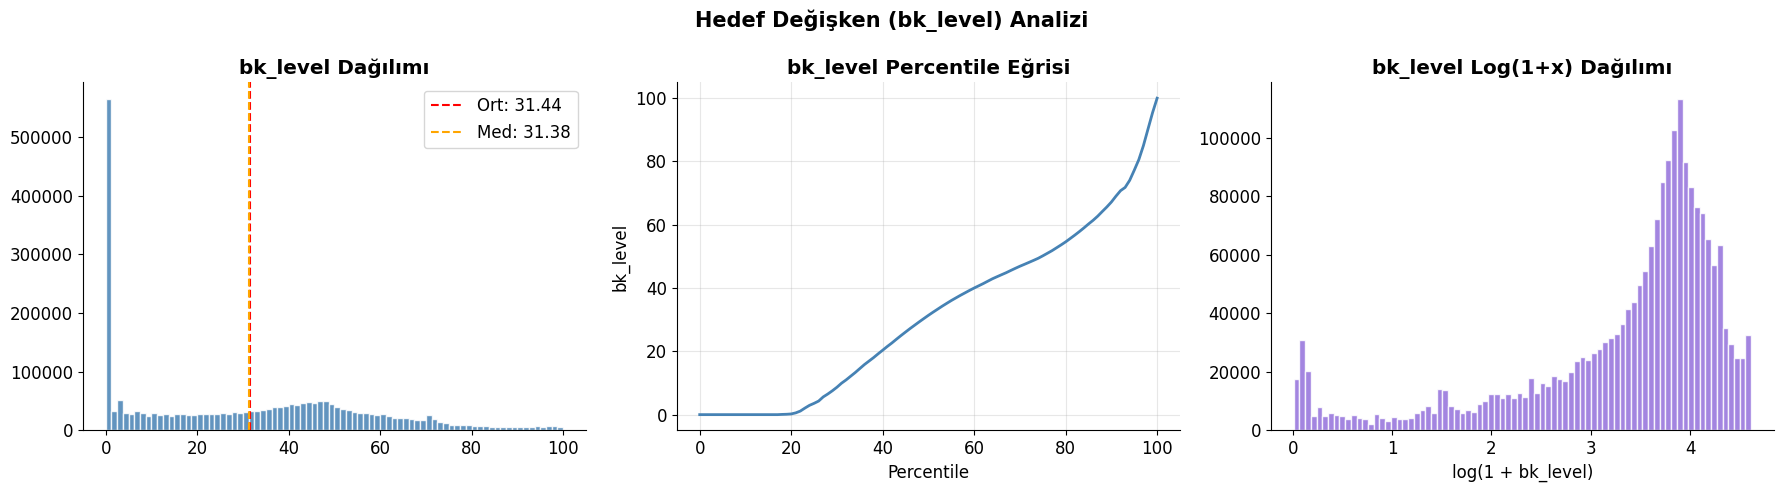

count    2.557652e+06
mean     3.143717e+01
std      2.626636e+01
min      0.000000e+00
25%      3.570000e+00
50%      3.138000e+01
75%      5.017000e+01
max      1.000000e+02
Name: bk_level, dtype: float64


In [25]:
TARGET = 'bk_level'

if TARGET in train.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram
    axes[0].hist(train[TARGET].dropna(), bins=80, color='steelblue', edgecolor='white', alpha=0.85)
    axes[0].axvline(train[TARGET].mean(), color='red', linestyle='--', label=f'Ort: {train[TARGET].mean():.2f}')
    axes[0].axvline(train[TARGET].median(), color='orange', linestyle='--', label=f'Med: {train[TARGET].median():.2f}')
    axes[0].set_title('bk_level Dağılımı', fontweight='bold')
    axes[0].legend()
    
    # Percentile grafiği
    percentiles = np.arange(0, 101, 1)
    vals = np.percentile(train[TARGET].dropna(), percentiles)
    axes[1].plot(percentiles, vals, color='steelblue', linewidth=2)
    axes[1].set_title('bk_level Percentile Eğrisi', fontweight='bold')
    axes[1].set_xlabel('Percentile')
    axes[1].set_ylabel('bk_level')
    axes[1].grid(alpha=0.3)
    
    # Log scale histogram
    pos_vals = train[TARGET].dropna()
    pos_vals = pos_vals[pos_vals > 0]
    if len(pos_vals) > 0:
        axes[2].hist(np.log1p(pos_vals), bins=80, color='mediumpurple', edgecolor='white', alpha=0.85)
        axes[2].set_title('bk_level Log(1+x) Dağılımı', fontweight='bold')
        axes[2].set_xlabel('log(1 + bk_level)')
    
    plt.suptitle('Hedef Değişken (bk_level) Analizi', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.savefig('target_analysis.png', dpi=120, bbox_inches='tight')
    plt.show()
    
    print(train[TARGET].describe())

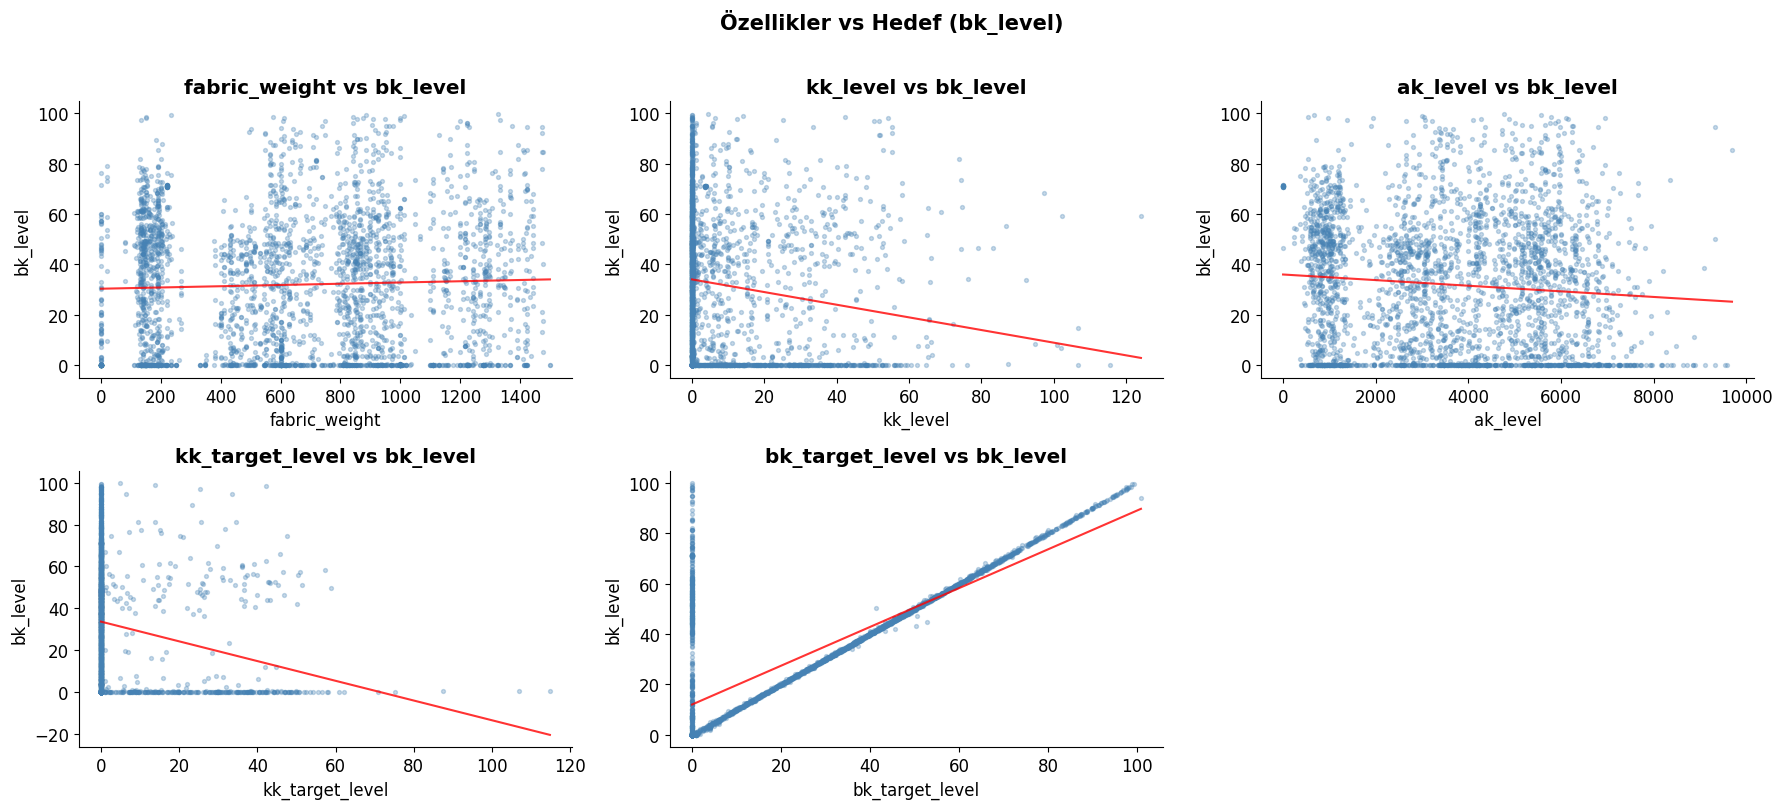

In [26]:
# bk_level vs diğer değişkenler — Scatter
if TARGET in train.columns:
    scatter_cols = [c for c in num_feat if c != TARGET and c in train.columns]
    nc = 3
    nr = int(np.ceil(len(scatter_cols)/nc))
    fig, axes = plt.subplots(nr, nc, figsize=(18, nr*4))
    axes = axes.flatten()
    
    scatter_sample = train.sample(min(3000, len(train)), random_state=42)
    for i, col in enumerate(scatter_cols):
        ax = axes[i]
        ax.scatter(scatter_sample[col], scatter_sample[TARGET],
                   alpha=0.3, s=8, color='steelblue', rasterized=True)
        # Trend çizgisi
        valid = scatter_sample[[col, TARGET]].dropna()
        if len(valid) > 10 and valid[col].std() > 0:
            z = np.polyfit(valid[col], valid[TARGET], 1)
            p = np.poly1d(z)
            xs = np.linspace(valid[col].min(), valid[col].max(), 100)
            ax.plot(xs, p(xs), 'r-', linewidth=1.5, alpha=0.8)
        ax.set_xlabel(col)
        ax.set_ylabel(TARGET)
        ax.set_title(f'{col} vs {TARGET}', fontweight='bold')
    
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Özellikler vs Hedef (bk_level)', fontsize=15, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.savefig('feature_vs_target.png', dpi=120, bbox_inches='tight')
    plt.show()

## 🧪 Bölüm 11 — Batch & Command Analizi

In [27]:
# Benzersiz değer sayıları
id_cols = ['machineid','batchkey','commandno','stepno','prgno']
summary_rows = []
for df_name, df in [('Train', train), ('Test', test)]:
    for col in id_cols:
        if col in df.columns:
            summary_rows.append({'Veri': df_name, 'Sütun': col,
                                 'Benzersiz': df[col].nunique(),
                                 'Min': df[col].min(),
                                 'Max': df[col].max()})

summary_df = pd.DataFrame(summary_rows)
print('=== ID Sütunları Özeti ===')
print(summary_df.to_string(index=False))

=== ID Sütunları Özeti ===
 Veri     Sütun  Benzersiz    Min    Max
Train machineid          5    105    243
Train  batchkey       1599 125440 144194
Train commandno          4     19     22
Train    stepno        100      1    113
Train     prgno        118      1   5553
 Test machineid          5    105    243
 Test  batchkey        595 125425 144175
 Test commandno          4     19     22
 Test    stepno         86      1     95
 Test     prgno         91     11   5552


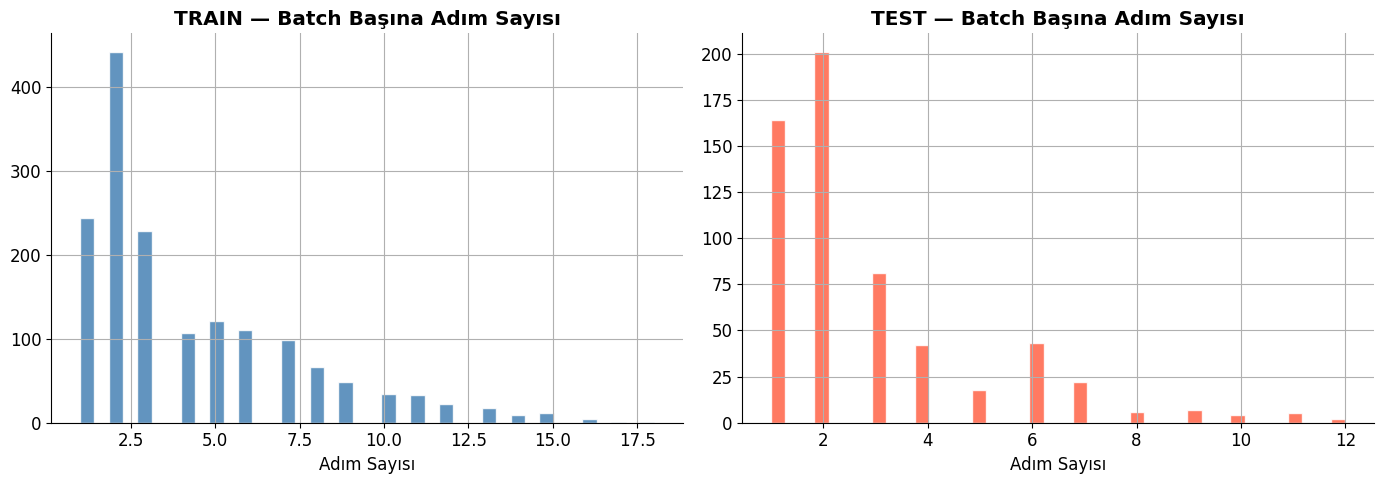

In [28]:
# Batch başına adım sayısı
steps_per_batch_train = train.groupby('batchkey')['stepno'].nunique()
steps_per_batch_test  = test.groupby('batchkey')['stepno'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
steps_per_batch_train.hist(bins=40, ax=axes[0], color='steelblue', alpha=0.85, edgecolor='white')
axes[0].set_title('TRAIN — Batch Başına Adım Sayısı', fontweight='bold')
axes[0].set_xlabel('Adım Sayısı')

steps_per_batch_test.hist(bins=40, ax=axes[1], color='tomato', alpha=0.85, edgecolor='white')
axes[1].set_title('TEST — Batch Başına Adım Sayısı', fontweight='bold')
axes[1].set_xlabel('Adım Sayısı')

plt.tight_layout()
plt.savefig('steps_per_batch.png', dpi=120, bbox_inches='tight')
plt.show()

## 📋 Bölüm 12 — Genel Özet Raporu

In [29]:
print('=' * 60)
print('           📊 EDA ÖZET RAPORU')
print('=' * 60)

print(f'\n📦 VERİ BÜYÜKLÜKLERİ')
print(f'  Train : {train.shape[0]:>10,} satır × {train.shape[1]} sütun')
print(f'  Test  : {test.shape[0]:>10,} satır × {test.shape[1]} sütun')

print(f'\n⏰ ZAMAN ARALIĞI')
print(f'  Train : {train["ts"].min()} → {train["ts"].max()}')
print(f'  Test  : {test["ts"].min()} → {test["ts"].max()}')

print(f'\n🏭 MAKİNELER')
print(f'  Train benzersiz makine: {train["machineid"].nunique()}')
print(f'  Test  benzersiz makine: {test["machineid"].nunique()}')

print(f'\n🔎 EKSİK DEĞERLER')
train_missing = train.isnull().sum().sum()
test_missing  = test.isnull().sum().sum()
print(f'  Train toplam eksik : {train_missing:,}')
print(f'  Test  toplam eksik : {test_missing:,}')

if TARGET in train.columns:
    print(f'\n🎯 HEDEF: {TARGET}')
    print(f'  Ortalama : {train[TARGET].mean():.4f}')
    print(f'  Medyan   : {train[TARGET].median():.4f}')
    print(f'  Std      : {train[TARGET].std():.4f}')
    print(f'  Min      : {train[TARGET].min():.4f}')
    print(f'  Max      : {train[TARGET].max():.4f}')

print('\n✅ EDA tamamlandı!')

           📊 EDA ÖZET RAPORU

📦 VERİ BÜYÜKLÜKLERİ
  Train :  2,557,652 satır × 28 sütun
  Test  :    635,133 satır × 28 sütun

⏰ ZAMAN ARALIĞI
  Train : 2025-08-13 04:14:50.573000+00:00 → 2026-02-13 03:33:11.105000+00:00
  Test  : 2025-08-13 01:24:30.961000+00:00 → 2026-02-13 01:13:38.080000+00:00

🏭 MAKİNELER
  Train benzersiz makine: 5
  Test  benzersiz makine: 5

🔎 EKSİK DEĞERLER
  Train toplam eksik : 0
  Test  toplam eksik : 0

🎯 HEDEF: bk_level
  Ortalama : 31.4372
  Medyan   : 31.3800
  Std      : 26.2664
  Min      : 0.0000
  Max      : 100.0000

✅ EDA tamamlandı!


## 🎮 Bölüm 13 — Komut Tipi Analizi (Transfer vs Dozaj)

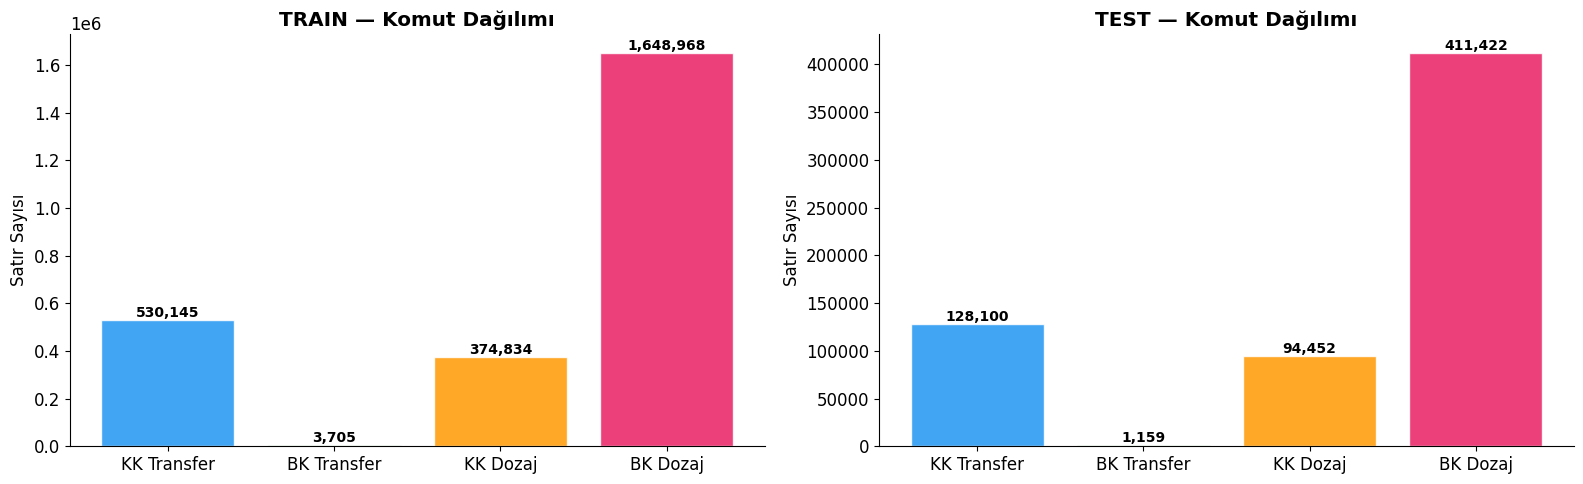

Transfer (19,20) vs Dozaj (21,22):
  Komut 19 (KK Transfer):    530,145 satır (20.7%)
  Komut 20 (BK Transfer):      3,705 satır (0.1%)
  Komut 21 (KK Dozaj):    374,834 satır (14.7%)
  Komut 22 (BK Dozaj):  1,648,968 satır (64.5%)


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Komut isimleri
CMD_NAMES = {19:'KK Transfer', 20:'BK Transfer', 21:'KK Dozaj', 22:'BK Dozaj'}
CMD_COLORS = {19:'#2196F3', 20:'#4CAF50', 21:'#FF9800', 22:'#E91E63'}

# Komut dağılımı
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
for ax, df, title in [(axes[0], train, 'TRAIN'), (axes[1], test, 'TEST')]:
    vc = df['commandno'].value_counts().sort_index()
    colors = [CMD_COLORS.get(c, 'gray') for c in vc.index]
    bars = ax.bar([CMD_NAMES.get(c, str(c)) for c in vc.index], vc.values, color=colors, alpha=0.85, edgecolor='white')
    for bar, val in zip(bars, vc.values):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+100, f'{val:,}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.set_title(f'{title} — Komut Dağılımı', fontweight='bold')
    ax.set_ylabel('Satır Sayısı')
plt.tight_layout()
plt.savefig('command_distribution.png', dpi=120, bbox_inches='tight')
plt.show()
print('Transfer (19,20) vs Dozaj (21,22):')
for cmd in sorted(train['commandno'].unique()):
    cnt = (train['commandno']==cmd).sum()
    print(f'  Komut {cmd} ({CMD_NAMES.get(cmd,"?")}): {cnt:>10,} satır ({cnt/len(train)*100:.1f}%)')

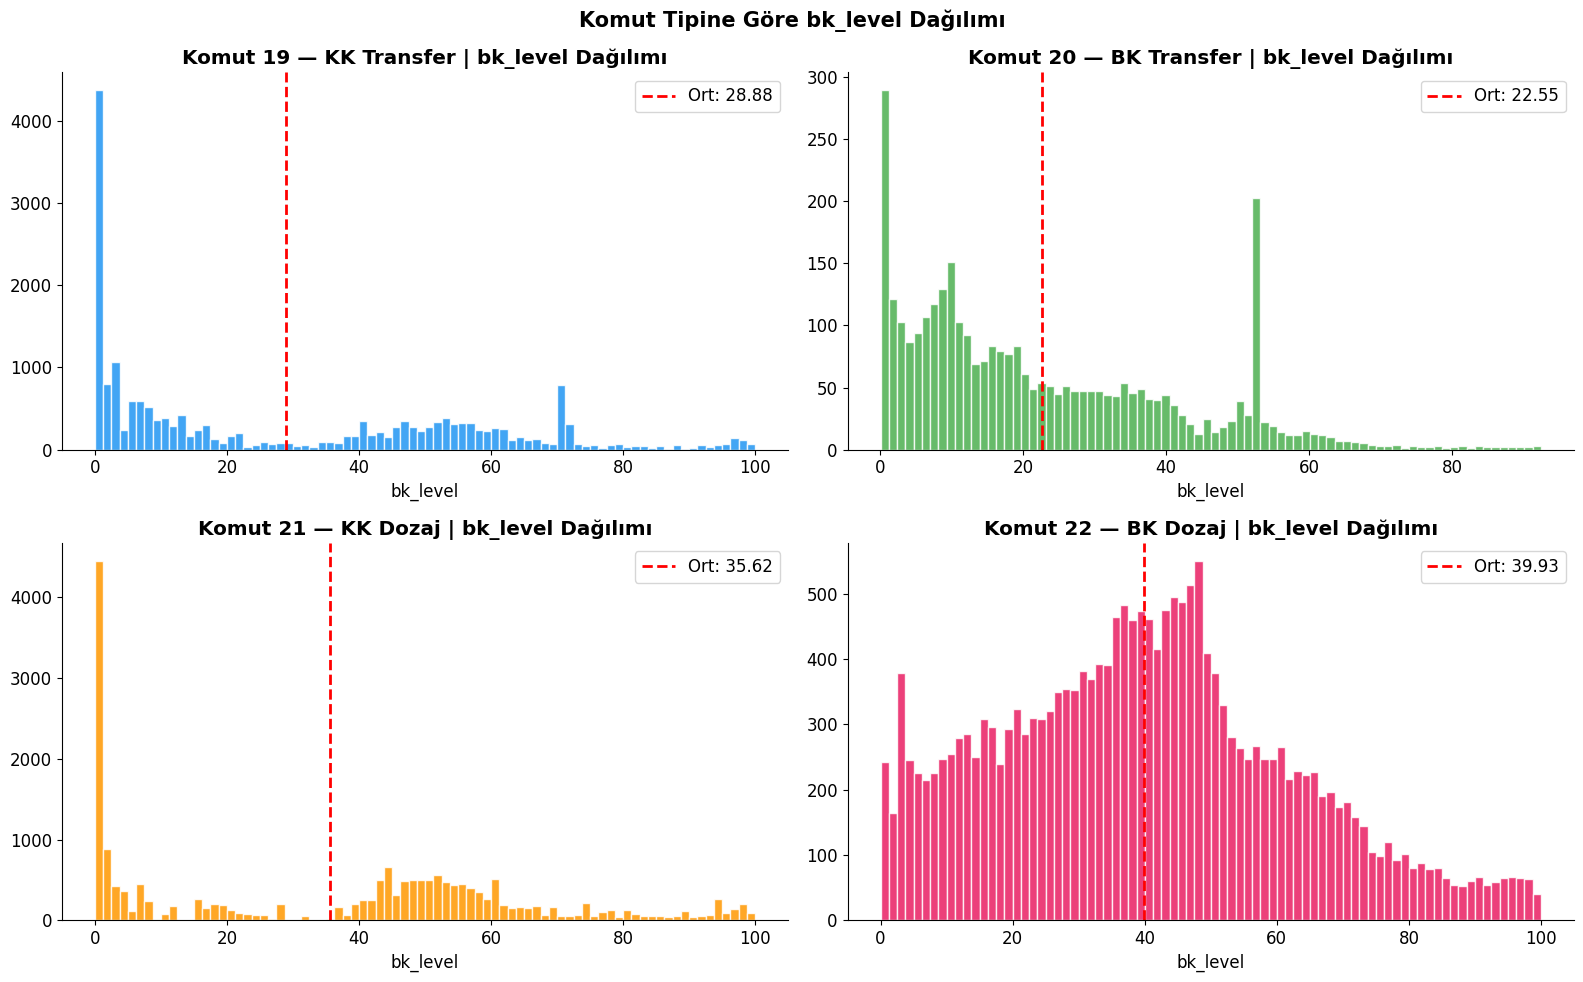

In [31]:
# bk_level dağılımı komut tipine göre
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i, cmd in enumerate(sorted(train['commandno'].unique())):
    ax = axes[i]
    subset = train[train['commandno']==cmd]['bk_level'].dropna()
    subset = subset[subset > 0]  # sıfır satırları çıkar
    ax.hist(subset.sample(min(20000, len(subset)), random_state=42),
            bins=80, color=CMD_COLORS.get(cmd,'gray'), alpha=0.85, edgecolor='white')
    ax.axvline(subset.mean(), color='red', linestyle='--', linewidth=2,
               label=f'Ort: {subset.mean():.2f}')
    ax.set_title(f'Komut {cmd} — {CMD_NAMES.get(cmd,"?")} | bk_level Dağılımı', fontweight='bold')
    ax.set_xlabel('bk_level')
    ax.legend()
plt.suptitle('Komut Tipine Göre bk_level Dağılımı', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('bklevel_by_command.png', dpi=120, bbox_inches='tight')
plt.show()

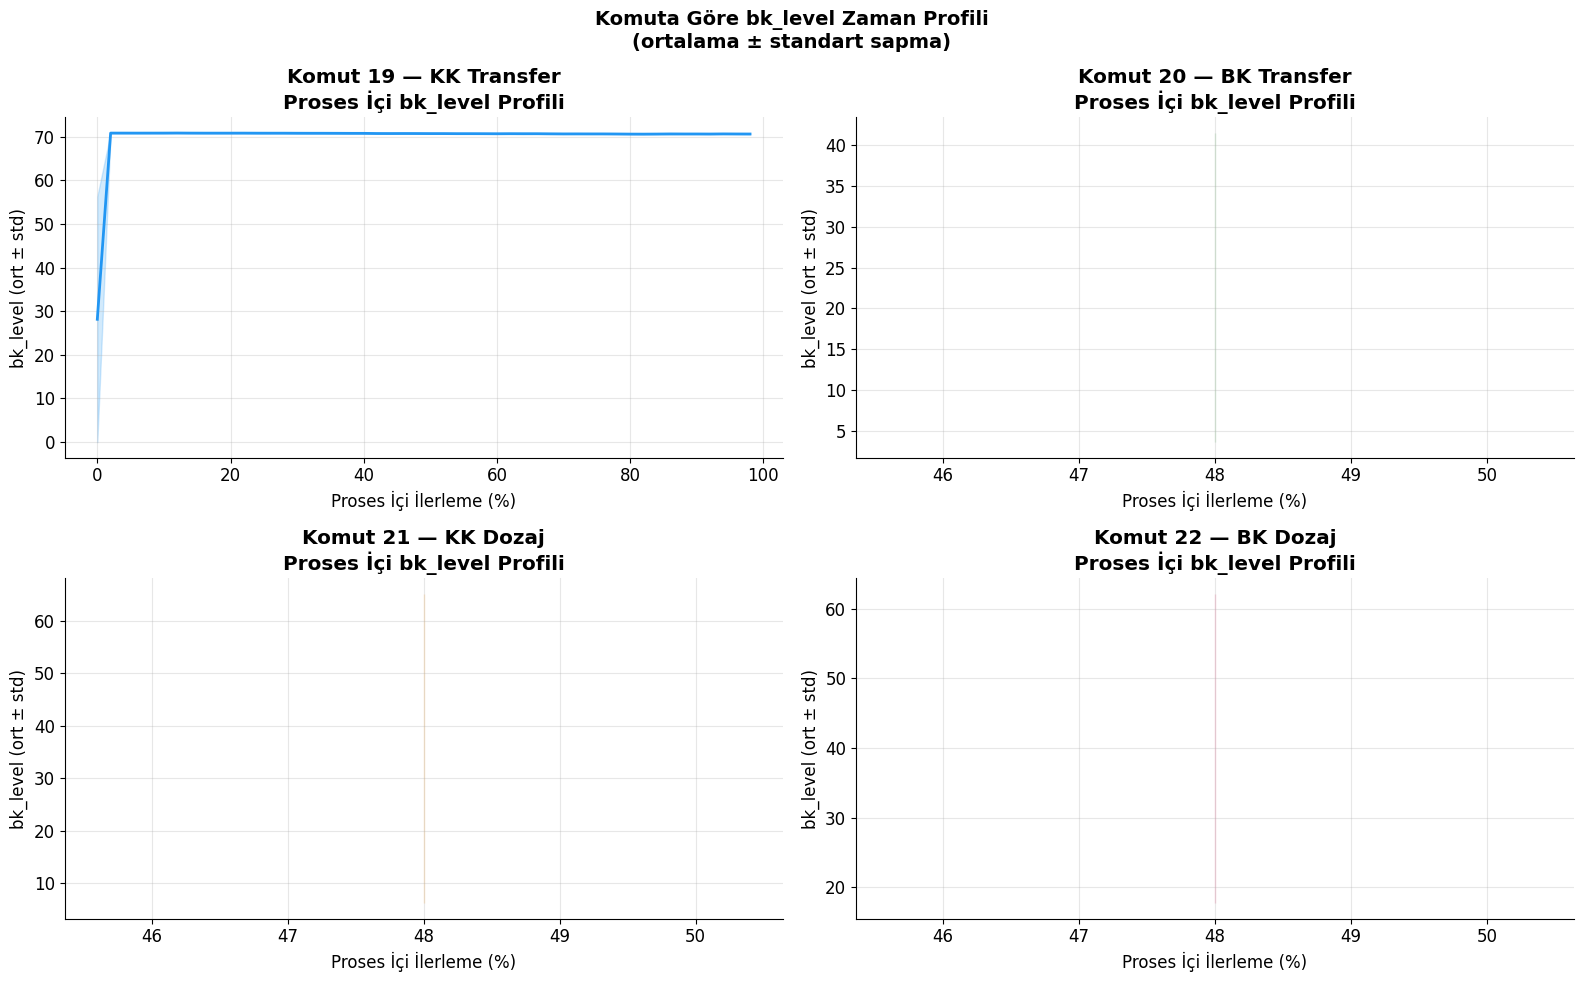

In [32]:
# Transfer vs Dozaj — ortalama proses profili
# Bir prosesin göreceli süresi içinde bk_level nasıl değişiyor?
import pandas as pd

train['rel_time'] = (train['ts'] - train['starttime']).dt.total_seconds()
train['proc_dur'] = (train['endtime'] - train['starttime']).dt.total_seconds()
train['rel_pct']  = (train['rel_time'] / train['proc_dur'].replace(0, np.nan) * 100).clip(0, 100)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, cmd in enumerate(sorted(train['commandno'].unique())):
    ax = axes[i]
    subset = train[(train['commandno']==cmd) & (train['bk_level'] > 0)].copy()
    # 100 bin'e böl, her bin için ortalama
    subset['bin'] = pd.cut(subset['rel_pct'], bins=50, labels=False)
    profile = subset.groupby('bin')['bk_level'].agg(['mean','std']).reset_index()
    ax.plot(profile['bin']*2, profile['mean'], color=CMD_COLORS.get(cmd,'gray'), linewidth=2)
    ax.fill_between(profile['bin']*2,
                    profile['mean'] - profile['std'],
                    profile['mean'] + profile['std'],
                    alpha=0.2, color=CMD_COLORS.get(cmd,'gray'))
    ax.set_title(f'Komut {cmd} — {CMD_NAMES.get(cmd,"?")}\nProses İçi bk_level Profili', fontweight='bold')
    ax.set_xlabel('Proses İçi İlerleme (%)')
    ax.set_ylabel('bk_level (ort ± std)')
    ax.grid(alpha=0.3)

plt.suptitle('Komuta Göre bk_level Zaman Profili\n(ortalama ± standart sapma)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('command_profile.png', dpi=120, bbox_inches='tight')
plt.show()

## 🏭 Bölüm 14 — Makine × Komut Çapraz Analizi

=== Makine × Komut Satır Sayısı ===
           KK Transfer  BK Transfer  KK Dozaj  BK Dozaj
machineid                                              
105             117085          579     46384    158741
119             128474         1548     77105    468707
121             111421          819     59246    297687
242              89645          759     63499    309346
243              83520            0    128600    414487


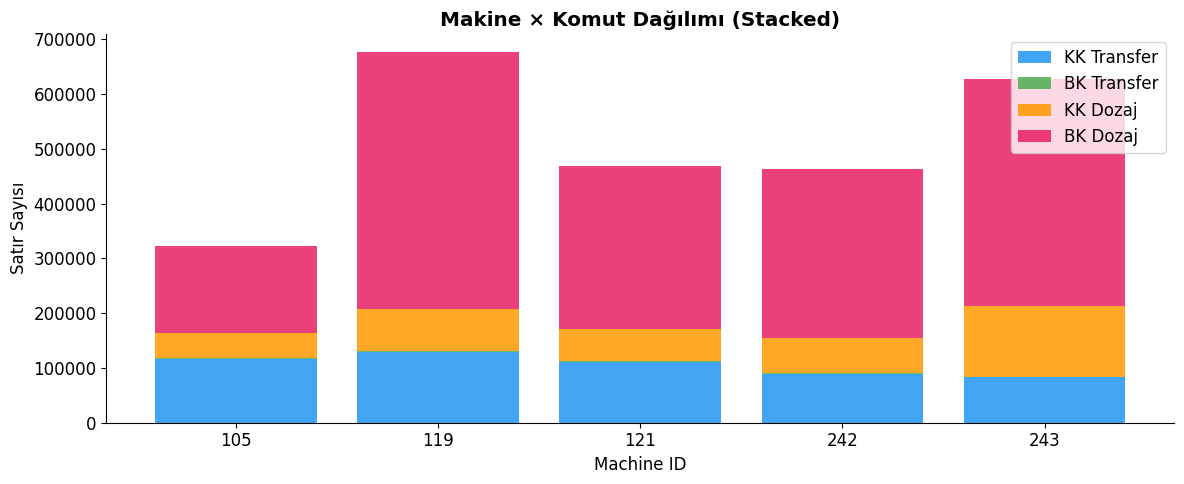


⚠️  Makine 243 — BK Transfer (komut 20): 0 satır (olmalı: 0!)


In [33]:
# Makine × Komut pivot tablosu
pivot = train.groupby(['machineid','commandno']).size().unstack(fill_value=0)
pivot.columns = [CMD_NAMES.get(c, str(c)) for c in pivot.columns]
print('=== Makine × Komut Satır Sayısı ===')
print(pivot)

fig, ax = plt.subplots(figsize=(12, 5))
bottom = np.zeros(len(pivot))
cols = list(pivot.columns)
bar_colors = ['#2196F3','#4CAF50','#FF9800','#E91E63']
for j, col in enumerate(cols):
    ax.bar(pivot.index.astype(str), pivot[col], bottom=bottom,
           label=col, color=bar_colors[j % len(bar_colors)], alpha=0.85)
    bottom += pivot[col].values
ax.set_title('Makine × Komut Dağılımı (Stacked)', fontweight='bold')
ax.set_xlabel('Machine ID')
ax.set_ylabel('Satır Sayısı')
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('machine_command_cross.png', dpi=120, bbox_inches='tight')
plt.show()
print('\n⚠️  Makine 243 — BK Transfer (komut 20):', (train[(train.machineid==243)&(train.commandno==20)].shape[0]), 'satır (olmalı: 0!)')

## 🔧 Bölüm 15 — Vana Durumu Analizi

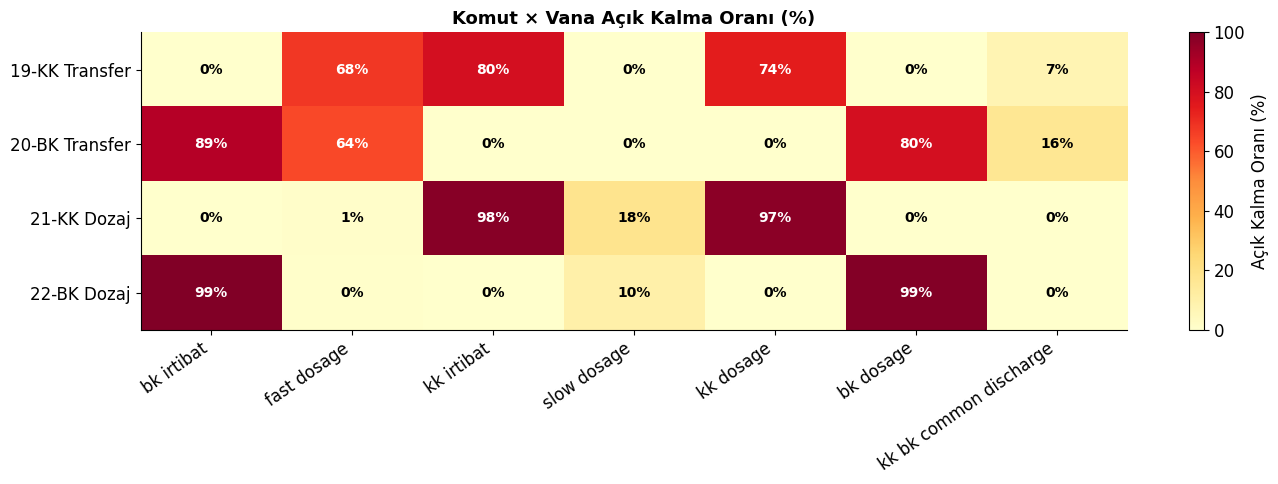


Vana Açık Kalma Oranları (%):
                  Satır  bk irtibat  fast dosage  kk irtibat  slow dosage  kk dosage  bk dosage  kk bk common discharge
Komut                                                                                                                  
19-KK Transfer   530145         0.1         67.9        80.0          0.0       74.5        0.1                     7.2
20-BK Transfer     3705        88.8         63.9         0.0          0.0        0.0       80.0                    16.1
21-KK Dozaj      374834         0.0          1.1        98.4         17.8       97.4        0.0                     0.0
22-BK Dozaj     1648968        99.3          0.4         0.0         10.0        0.0       99.0                     0.0


In [34]:
VALVE_COLS = ['bk_irtibat_valve','fast_dosage_valve','kk_irtibat_valve',
              'slow_dosage_valve','kk_dosage_valve','bk_dosage_valve','kk_bk_common_discharge']

# Her komut için kaç saniye vanalar açık?
valve_by_cmd = []
for cmd in sorted(train['commandno'].unique()):
    subset = train[train['commandno']==cmd]
    row = {'Komut': f'{cmd}-{CMD_NAMES.get(cmd,"?")}', 'Satır': len(subset)}
    for v in VALVE_COLS:
        if v in subset.columns:
            pct = (subset[v].astype(str).str.upper() == 'TRUE').mean() * 100
            row[v.replace('_valve','').replace('_',' ')] = round(pct, 1)
    valve_by_cmd.append(row)

valve_df = pd.DataFrame(valve_by_cmd).set_index('Komut')
valve_show = valve_df.drop(columns=['Satır'], errors='ignore')

fig, ax = plt.subplots(figsize=(14, 5))
im = ax.imshow(valve_show.values.astype(float), cmap='YlOrRd', aspect='auto', vmin=0, vmax=100)
ax.set_xticks(range(len(valve_show.columns)))
ax.set_xticklabels(valve_show.columns, rotation=35, ha='right')
ax.set_yticks(range(len(valve_show.index)))
ax.set_yticklabels(valve_show.index)
plt.colorbar(im, ax=ax, label='Açık Kalma Oranı (%)')
for i in range(len(valve_show.index)):
    for j in range(len(valve_show.columns)):
        val = valve_show.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.0f}%', ha='center', va='center',
                    fontsize=10, color='black' if val < 60 else 'white', fontweight='bold')
ax.set_title('Komut × Vana Açık Kalma Oranı (%)', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('valve_heatmap.png', dpi=120, bbox_inches='tight')
plt.show()
print('\nVana Açık Kalma Oranları (%):')
print(valve_df.to_string())

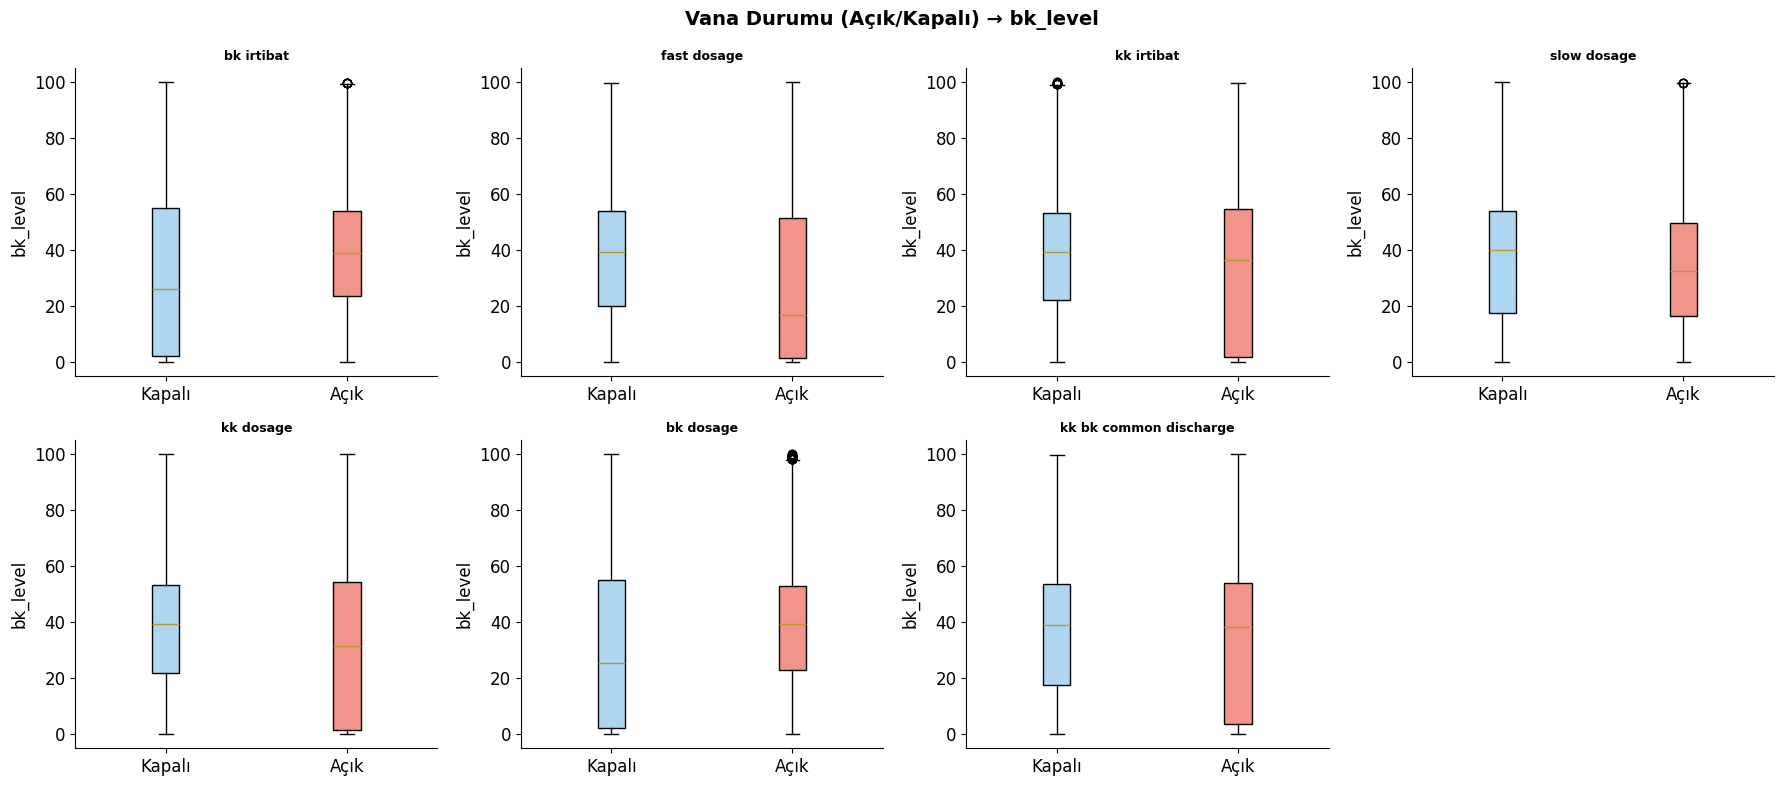

In [35]:
# Vana durumuna göre bk_level değişimi
bk_valve = train[train['bk_level'] > 0]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, v in enumerate(VALVE_COLS):
    ax = axes[i]
    if v not in bk_valve.columns:
        ax.set_visible(False); continue
    closed = bk_valve[bk_valve[v].astype(str).str.upper() == 'FALSE']['bk_level']
    opened = bk_valve[bk_valve[v].astype(str).str.upper() == 'TRUE']['bk_level']
    data = [closed.sample(min(5000,len(closed)),random_state=42).values,
            opened.sample(min(5000,len(opened)),random_state=42).values]
    bp = ax.boxplot(data, labels=['Kapalı','Açık'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#AED6F1')
    bp['boxes'][1].set_facecolor('#F1948A')
    ax.set_title(v.replace('_valve','').replace('_',' '), fontweight='bold', fontsize=9)
    ax.set_ylabel('bk_level')

axes[-1].set_visible(False)
plt.suptitle('Vana Durumu (Açık/Kapalı) → bk_level', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('valve_vs_bklevel.png', dpi=120, bbox_inches='tight')
plt.show()

## 🎯 Bölüm 16 — bk_target_level vs bk_level (En Güçlü Feature)

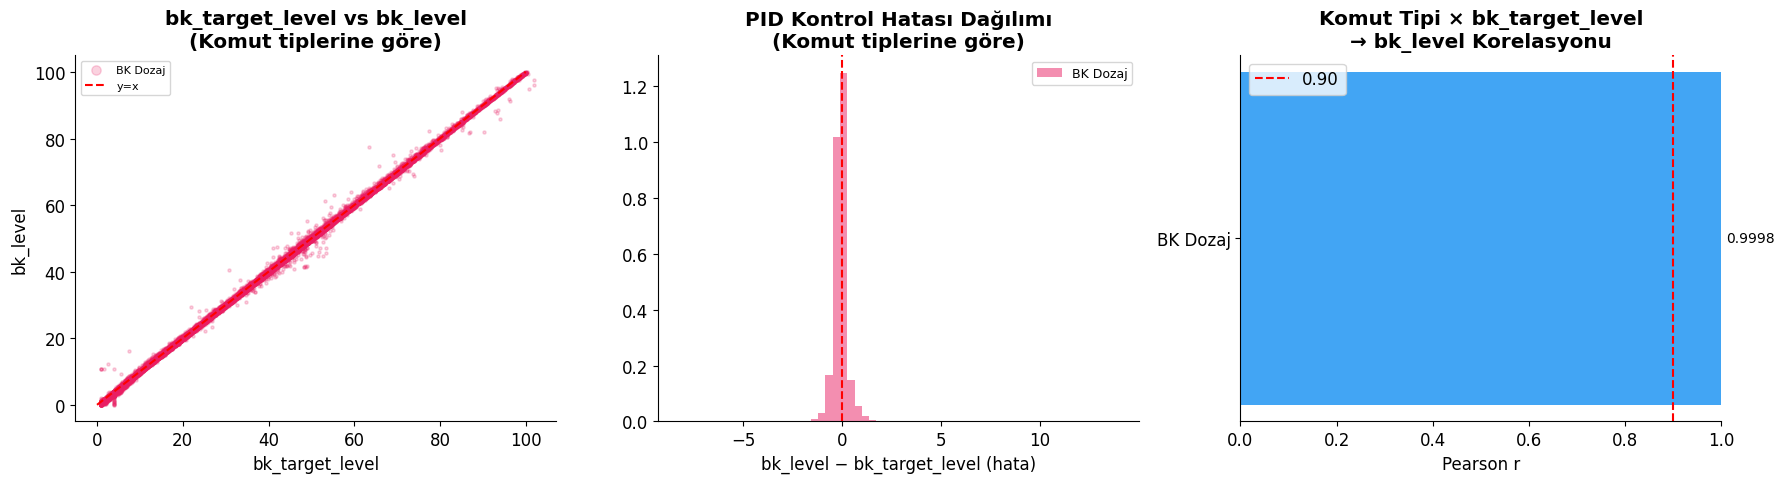

In [36]:
# bk_target_level → bk_level en güçlü feature
target_subset = train[(train['bk_level'] > 0) & (train['bk_target_level'] > 0)]
sample_t = target_subset.sample(min(30000, len(target_subset)), random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter: bk_target_level vs bk_level (komut renkli)
for cmd in sorted(sample_t['commandno'].unique()):
    chunk = sample_t[sample_t['commandno']==cmd]
    axes[0].scatter(chunk['bk_target_level'], chunk['bk_level'],
                    alpha=0.2, s=5, label=CMD_NAMES.get(cmd,str(cmd)),
                    color=CMD_COLORS.get(cmd,'gray'), rasterized=True)
axes[0].plot([0,100],[0,100],'r--', linewidth=1.5, label='y=x')
axes[0].set_xlabel('bk_target_level')
axes[0].set_ylabel('bk_level')
axes[0].set_title('bk_target_level vs bk_level\n(Komut tiplerine göre)', fontweight='bold')
axes[0].legend(markerscale=3, fontsize=8)

# Error = bk_level - bk_target_level dağılımı
target_subset2 = train[(train['bk_level']>0) & (train['bk_target_level']>0)].copy()
target_subset2['error'] = target_subset2['bk_level'] - target_subset2['bk_target_level']
for cmd in sorted(target_subset2['commandno'].unique()):
    chunk = target_subset2[target_subset2['commandno']==cmd]['error']
    chunk = chunk.sample(min(10000, len(chunk)), random_state=42)
    axes[1].hist(chunk, bins=60, alpha=0.5, label=CMD_NAMES.get(cmd,str(cmd)),
                 color=CMD_COLORS.get(cmd,'gray'), density=True)
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_xlabel('bk_level − bk_target_level (hata)')
axes[1].set_title('PID Kontrol Hatası Dağılımı\n(Komut tiplerine göre)', fontweight='bold')
axes[1].legend(fontsize=9)

# Korelasyon: her komut için bk_target vs bk_level
corr_by_cmd = []
for cmd in sorted(train['commandno'].unique()):
    chunk = train[(train['commandno']==cmd) & (train['bk_level']>0) & (train['bk_target_level']>0)]
    if len(chunk) > 100:
        c = chunk[['bk_level','bk_target_level']].corr().iloc[0,1]
        corr_by_cmd.append({'Komut': CMD_NAMES.get(cmd,str(cmd)), 'Korelasyon': round(c,4)})
corr_cmd_df = pd.DataFrame(corr_by_cmd)
axes[2].barh(corr_cmd_df['Komut'], corr_cmd_df['Korelasyon'],
             color=[CMD_COLORS.get(k,'gray') for k in sorted(train['commandno'].unique())], alpha=0.85)
axes[2].set_xlim(0,1)
axes[2].axvline(0.9, color='red', linestyle='--', label='0.90')
axes[2].set_title('Komut Tipi × bk_target_level\n→ bk_level Korelasyonu', fontweight='bold')
axes[2].set_xlabel('Pearson r')
axes[2].legend()
for i, row in corr_cmd_df.iterrows():
    axes[2].text(row['Korelasyon']+0.01, i, f'{row["Korelasyon"]:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('target_level_analysis.png', dpi=120, bbox_inches='tight')
plt.show()

## ⚡ Bölüm 17 — Feature Engineering Önerileri (Leakage-Free)

=== Feature → bk_level Korelasyonu (Komut Tiplerine Göre) ===
Komut            BK Dozaj  BK Transfer  KK Dozaj  KK Transfer  Tüm Komutlar
Feature                                                                    
ak_level          -0.0182      -0.2285   -0.2974      -0.2754       -0.0971
bk_target_level    0.9703          NaN       NaN          NaN        0.6962
elapsed_pct           NaN          NaN       NaN       0.1721        0.0587
elapsed_sec           NaN          NaN       NaN       0.1721        0.0587
fabric_weight      0.0261      -0.1322    0.0442      -0.0991        0.0250
kk_level          -0.0196       0.0476   -0.0113       0.0585       -0.0368
proc_dur           0.2869       0.4319   -0.0229       0.3093        0.2398
rel_time          -0.3191      -0.2175   -0.0796       0.2644       -0.0377
remaining_sec      0.6254       0.7600   -0.0031       0.2642        0.3992


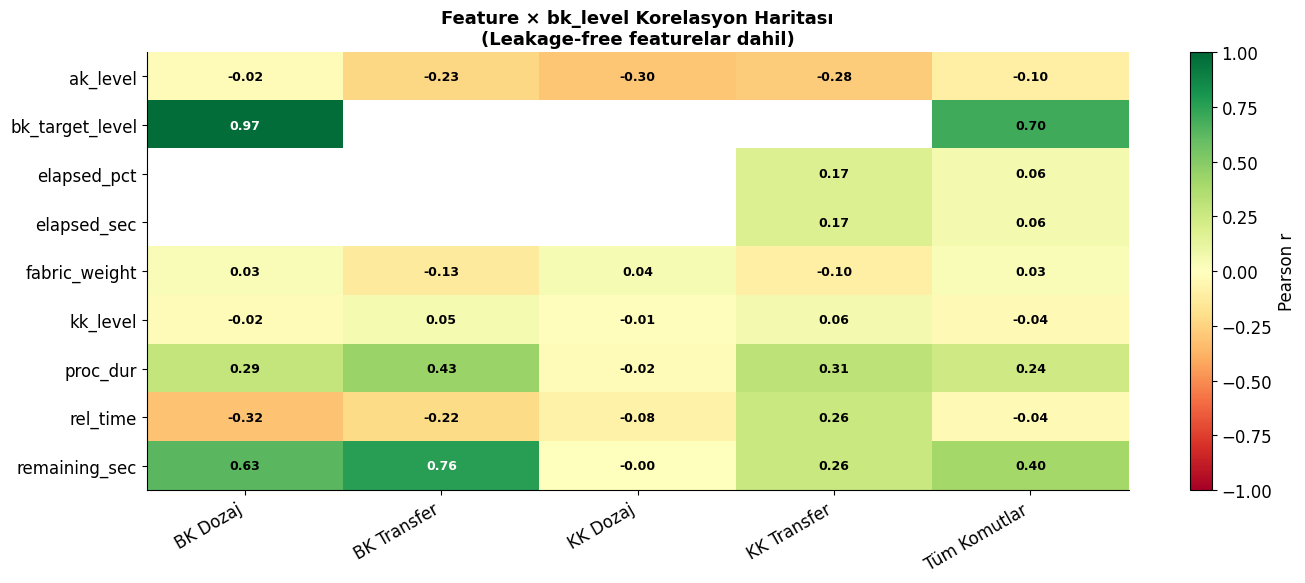

In [37]:
# Proses içi göreceli zaman özelliklerini hesapla ve etkisini göster
train['elapsed_sec']  = (train['ts'] - train['starttime']).dt.total_seconds().clip(0)
train['remaining_sec'] = (train['endtime'] - train['ts']).dt.total_seconds().clip(0)
train['proc_dur2']     = (train['endtime'] - train['starttime']).dt.total_seconds()
train['elapsed_pct']   = (train['elapsed_sec'] / train['proc_dur2'].replace(0,np.nan) * 100).clip(0,100)

# Bu featureların bk_level ile korelasyonu
new_feats = ['elapsed_sec','remaining_sec','elapsed_pct','rel_time','proc_dur']
existing_feats = ['bk_target_level','kk_level','ak_level','fabric_weight']
all_feats = [f for f in new_feats + existing_feats if f in train.columns]

feat_corr = []
for f in all_feats:
    for cmd in [None, 19, 20, 21, 22]:
        if cmd is None:
            subset = train[train['bk_level'] > 0]
            label = 'Tüm Komutlar'
        else:
            subset = train[(train['commandno']==cmd) & (train['bk_level']>0)]
            label = CMD_NAMES.get(cmd, str(cmd))
        if f not in subset.columns or len(subset) < 100:
            continue
        valid = subset[[f,'bk_level']].dropna()
        if len(valid) < 100 or valid[f].std() == 0:
            continue
        c = valid.corr().iloc[0,1]
        feat_corr.append({'Feature': f, 'Komut': label, 'Korelasyon': round(c, 4)})

corr_tbl = pd.DataFrame(feat_corr).pivot(index='Feature', columns='Komut', values='Korelasyon')
print('=== Feature → bk_level Korelasyonu (Komut Tiplerine Göre) ===')
print(corr_tbl.round(4).to_string())

fig, ax = plt.subplots(figsize=(14, 6))
im = ax.imshow(corr_tbl.values.astype(float), cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr_tbl.columns)))
ax.set_xticklabels(corr_tbl.columns, rotation=30, ha='right')
ax.set_yticks(range(len(corr_tbl.index)))
ax.set_yticklabels(corr_tbl.index)
plt.colorbar(im, ax=ax, label='Pearson r')
for i in range(len(corr_tbl.index)):
    for j in range(len(corr_tbl.columns)):
        val = corr_tbl.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center',
                    fontsize=9, color='black' if abs(val) < 0.7 else 'white', fontweight='bold')
ax.set_title('Feature × bk_level Korelasyon Haritası\n(Leakage-free featurelar dahil)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance_heatmap.png', dpi=120, bbox_inches='tight')
plt.show()

In [38]:
# ─── Önerilen Feature Listesi ────────────────────────────────
print("""
╔══════════════════════════════════════════════════════════════════╗
║           🚀 ÖNERİLEN FEATURE MÜHENDİSLİĞİ PLANI              ║
╠══════════════════════════════════════════════════════════════════╣
║  [ZAMAN ÖZELLİKLERİ — Leakage-free]                           ║
║    elapsed_sec   : Proses başından geçen süre (sn)             ║
║    remaining_sec : Proses bitimine kalan süre (sn)             ║
║    elapsed_pct   : Proses içi ilerleme yüzdesi (%)             ║
║    proc_dur      : Toplam proses süresi (sn)                   ║
║                                                                  ║
║  [KOMUT ÖZELLİKLERİ]                                           ║
║    is_transfer   : Komut 19/20 = 1, Komut 21/22 = 0            ║
║    is_bk_cmd     : Komut 20/22 = 1 (BK kaynaklı), 19/21 = 0   ║
║    commandno_enc : Label encoding veya one-hot                  ║
║                                                                  ║
║  [HEDEF İLE İLGİLİ — Leakage-free]                            ║
║    bk_target_level ★ : Dozaj hedefi — en güçlü feature        ║
║    pid_error       : bk_level - bk_target_level (SADECE TRAIN) ║
║    target_diff     : bk_target - mevcut tahmin (autoregressive) ║
║                                                                  ║
║  [VANA KOMBİNASYONLARI]                                        ║
║    n_valves_open   : Aynı anda açık vana sayısı                ║
║    bk_fully_open   : bk_irtibat & fast_dosage aynı anda açık?  ║
║                                                                  ║
║  [DİĞER SENSORLER]                                             ║
║    kk_level        : KK seviyesi                               ║
║    ak_level        : Ana kazan seviyesi (litre)                ║
║    fabric_weight   : Kumaş ağırlığı                            ║
║    kk_mikser_robotu: Salınım yapıcı                             ║
║    bk_mikser_robotu: Salınım yapıcı                             ║
║                                                                  ║
║  [⚠️ DATA LEAKAGE RISKI — KULLANMA!]                          ║
║    bk_lag1         : Bir önceki saniyenin bk_level değeri       ║
║    bk_rolling_mean : Kayan ortalama                             ║
╚══════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════╗
║           🚀 ÖNERİLEN FEATURE MÜHENDİSLİĞİ PLANI              ║
╠══════════════════════════════════════════════════════════════════╣
║  [ZAMAN ÖZELLİKLERİ — Leakage-free]                           ║
║    elapsed_sec   : Proses başından geçen süre (sn)             ║
║    remaining_sec : Proses bitimine kalan süre (sn)             ║
║    elapsed_pct   : Proses içi ilerleme yüzdesi (%)             ║
║    proc_dur      : Toplam proses süresi (sn)                   ║
║                                                                  ║
║  [KOMUT ÖZELLİKLERİ]                                           ║
║    is_transfer   : Komut 19/20 = 1, Komut 21/22 = 0            ║
║    is_bk_cmd     : Komut 20/22 = 1 (BK kaynaklı), 19/21 = 0   ║
║    commandno_enc : Label encoding veya one-hot                  ║
║                                                                  ║
║  [HEDEF İLE İLGİLİ — Leakage-free]                    

## 🔬 Bölüm 18 — Örnek Proses Görselleştirmesi (Tek Batch)

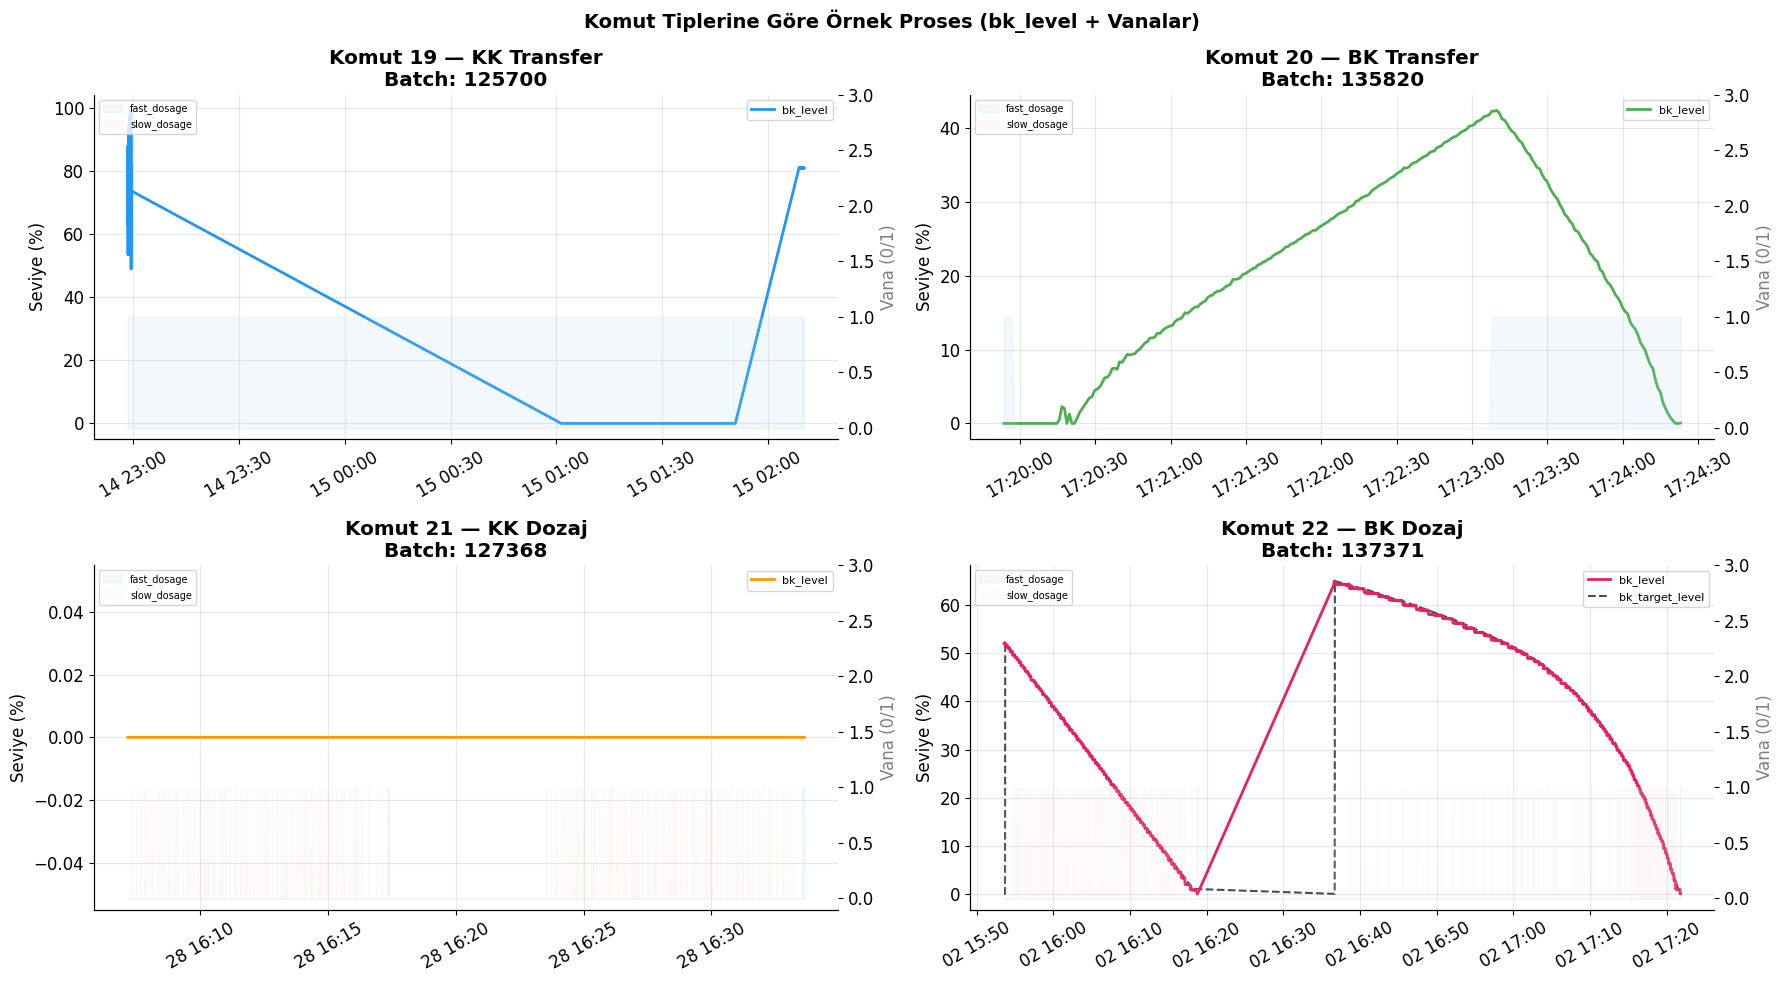

In [39]:
# Her komut tipinden bir örnek proses seç ve görselleştir
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, cmd in enumerate(sorted(train['commandno'].unique())):
    ax = axes[i]
    # Bu komut tipinden rastgele bir batch seç
    batches = train[train['commandno']==cmd]['batchkey'].unique()
    np.random.seed(42+cmd)
    batch = np.random.choice(batches)
    proc = train[(train['batchkey']==batch) & (train['commandno']==cmd)].sort_values('ts')

    ax2 = ax.twinx()
    ax.plot(proc['ts'], proc['bk_level'], color=CMD_COLORS.get(cmd,'gray'),
            linewidth=2, label='bk_level', zorder=3)
    if 'bk_target_level' in proc.columns and proc['bk_target_level'].sum() > 0:
        ax.plot(proc['ts'], proc['bk_target_level'], 'k--',
                linewidth=1.5, label='bk_target_level', alpha=0.7)
    # Vana durumlarını arka planda göster
    for v, vc in zip(['fast_dosage_valve','slow_dosage_valve'],['#AED6F1','#FADBD8']):
        if v in proc.columns:
            proc[v+'_num'] = proc[v].astype(str).str.upper().map({'TRUE':1,'FALSE':0}).fillna(0)
            ax2.fill_between(proc['ts'], proc[v+'_num'], alpha=0.15, color=vc, label=v.replace('_valve',''))
    ax.set_title(f'Komut {cmd} — {CMD_NAMES.get(cmd,"?")}\nBatch: {batch}', fontweight='bold')
    ax.set_ylabel('Seviye (%)')
    ax2.set_ylabel('Vana (0/1)', alpha=0.5)
    ax2.set_ylim(-0.1, 3)
    ax.legend(loc='upper right', fontsize=8)
    ax2.legend(loc='upper left', fontsize=7)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', rotation=30)

plt.suptitle('Komut Tiplerine Göre Örnek Proses (bk_level + Vanalar)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('sample_processes.png', dpi=120, bbox_inches='tight')
plt.show()

## 📋 Bölüm 19 — Yarışma Strateji Özeti

In [40]:
# bk_level = 0 satırlarının oranı
zero_pct = (train['bk_level'] == 0).mean() * 100
nonzero_cnt = (train['bk_level'] > 0).sum()
print(f'\nbk_level = 0 satır oranı : {zero_pct:.2f}% (değerlendirme dışı!)')
print(f'bk_level > 0 satır sayısı: {nonzero_cnt:,} (bunlar puanlanacak!)')

# Transfer vs Dozaj satır oranları
transfer_cnt = train[train['commandno'].isin([19,20])].shape[0]
dozaj_cnt    = train[train['commandno'].isin([21,22])].shape[0]
print(f'\nTransfer satırları (19,20): {transfer_cnt:,} ({transfer_cnt/len(train)*100:.1f}%)')
print(f'Dozaj satırları (21,22)   : {dozaj_cnt:,} ({dozaj_cnt/len(train)*100:.1f}%)')

print("""
╔══════════════════════════════════════════════════════════╗
║              🏆 YARIŞ STRATEJİSİ                        ║
╠══════════════════════════════════════════════════════════╣
║  1. Transfer (19,20) ve Dozaj (21,22) için               ║
║     AYRI modeller eğit — davranışlar çok farklı!        ║
║                                                          ║
║  2. bk_target_level ★ en güçlü feature — kesinlikle     ║
║     modele dahil et                                      ║
║                                                          ║
║  3. elapsed_pct (proses içi ilerleme) ekle —             ║
║     leakage-free ve çok informatif                       ║
║                                                          ║
║  4. Autoregressive tahmin: test'te bir önceki            ║
║     tahmini lag feature olarak kullan (sıralı predict)  ║
║                                                          ║
║  5. bk_level=0 satırları için 0.0 yaz, puanlanmaz        ║
║                                                          ║
║  6. Makine 243 için komut 20 yoktur — model için         ║
║     dikkat et                                            ║
╚══════════════════════════════════════════════════════════╝
""")


bk_level = 0 satır oranı : 17.28% (değerlendirme dışı!)
bk_level > 0 satır sayısı: 2,115,576 (bunlar puanlanacak!)



Transfer satırları (19,20): 533,850 (20.9%)
Dozaj satırları (21,22)   : 2,023,802 (79.1%)

╔══════════════════════════════════════════════════════════╗
║              🏆 YARIŞ STRATEJİSİ                        ║
╠══════════════════════════════════════════════════════════╣
║  1. Transfer (19,20) ve Dozaj (21,22) için               ║
║     AYRI modeller eğit — davranışlar çok farklı!        ║
║                                                          ║
║  2. bk_target_level ★ en güçlü feature — kesinlikle     ║
║     modele dahil et                                      ║
║                                                          ║
║  3. elapsed_pct (proses içi ilerleme) ekle —             ║
║     leakage-free ve çok informatif                       ║
║                                                          ║
║  4. Autoregressive tahmin: test'te bir önceki            ║
║     tahmini lag feature olarak kullan (sıralı predict)  ║
║                                                          